# Определение закономерностей, определяющих успешность игр.

## План работ:  

- 1 Ознакомление с данными.
- 2 Подготовка данных.
- 3 Анализ данных.
- 4 Составление портрета пользователя каждого региона.
- 5 Проверка гипотиз.
- 6 Общий вывод.

## Описание данных:  

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы долларов)
- EU_sales — продажи в Европе (миллионы долларов)
- JP_sales — продажи в Японии (миллионы долларов)
- Other_sales — продажи в других странах (миллионы долларов)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.  

Данные за 2016 год могут быть неполными.

## 1 Ознакомление с данными.

In [1]:
import pandas as pd

In [2]:
games = pd.read_csv('datasets/games.csv')
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [3]:
games.head(30)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Видим, что в данных есть пропуски, не удобные типы данных типа float, также float вместо dt или хотябы int в столбце Year_of_Release, верхний регистр в названиях столбцов.

## 2 Подготовка данных.

Приведём названия столбцов к нижнему регистру:

In [4]:
list_сolumns = []
for i in games:
    list_сolumns.append(i.lower())
print(list_сolumns)

['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating']


In [5]:
games.columns = list_сolumns
games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Заполним пропуски нулями и заменим тип данных на int в столбце year_of_release:

In [6]:
games.loc[:, 'year_of_release'].isna().sum()

269

In [7]:
games.loc[:, 'year_of_release'].fillna(0, inplace=True)

In [8]:
games.loc[:, 'year_of_release'] = games['year_of_release'].astype('int')

In [9]:
games.loc[:, 'year_of_release'].isna().sum()

0

In [10]:
games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [11]:
games.query('year_of_release == 0')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,0,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,0,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,0,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,0,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,0,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,0,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,0,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,0,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,0,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Посмотрим столбец name:

In [12]:
games.loc[:, 'name'].isna().sum()

2

In [13]:
games.loc[:, 'name'] = games['name'].fillna('unknown')

In [14]:
games.query('name == "unknown"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,unknown,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,unknown,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Там, где неизвестен name, неизвестен и genre. Думаю можно избавится от этих строк, т.к. их всего 2:

In [15]:
games = games.query('name != "unknown"')

In [16]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int32  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(5), int32(1), object(5)
memory usage: 1.5+ MB


Умножим все продажи на 1 000 000(переведём в доллары), чтобы избавится от float, т.к. он занимает больше памяти и переведём тип данных в int: миллионы долларов 4 260 000 = 4.26 

In [17]:
list_sales = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']
for i in list_sales:
    games.loc[:, i] = games.loc[:, i] * 1000000
games

D:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41360000.0,28960000.0,3770000.0,8450000.0,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29080000.0,3580000.0,6810000.0,770000.0,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15680000.0,12760000.0,3790000.0,3290000.0,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15610000.0,10930000.0,3280000.0,2950000.0,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11270000.0,8890000.0,10220000.0,1000000.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.0,0.0,10000.0,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.0,10000.0,0.0,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.0,0.0,10000.0,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,10000.0,0.0,0.0,0.0,NaN,NaN,NaN


In [18]:
games.loc[:, ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']] = games.loc[:, ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].astype('int')
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int32  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  int32  
 5   eu_sales         16713 non-null  int32  
 6   jp_sales         16713 non-null  int32  
 7   other_sales      16713 non-null  int32  
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(1), int32(5), object(5)
memory usage: 1.2+ MB


D:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Посмотрим на столбец critic_score:

In [19]:
games['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

Заполним пропуски нулями:

In [20]:
games.loc[:, 'critic_score'] = games['critic_score'].fillna(0)

In [21]:
games['critic_score'].unique()

array([76.,  0., 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

Переведём тип в int:

In [22]:
games.loc[:, 'critic_score'] = games['critic_score'].astype('int')
games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41360000,28960000,3770000,8450000,76,8,E
1,Super Mario Bros.,NES,1985,Platform,29080000,3580000,6810000,770000,0,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15680000,12760000,3790000,3290000,82,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15610000,10930000,3280000,2950000,80,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11270000,8890000,10220000,1000000,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0,0,10000,0,0,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0,10000,0,0,0,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0,0,10000,0,0,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,10000,0,0,0,0,NaN,NaN


In [23]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   name             16713 non-null  object
 1   platform         16713 non-null  object
 2   year_of_release  16713 non-null  int32 
 3   genre            16713 non-null  object
 4   na_sales         16713 non-null  int32 
 5   eu_sales         16713 non-null  int32 
 6   jp_sales         16713 non-null  int32 
 7   other_sales      16713 non-null  int32 
 8   critic_score     16713 non-null  int32 
 9   user_score       10014 non-null  object
 10  rating           9949 non-null   object
dtypes: int32(6), object(5)
memory usage: 1.1+ MB


Посмотрим на столбец user_score:

In [24]:
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Видим значение tbd. Попробуем посмотреть на строки с этими значениями:

In [25]:
games.query('user_score == "tbd"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3450000,2590000,0,660000,0,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2080000,1350000,0,540000,61,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1510000,1030000,0,270000,0,tbd,T
645,uDraw Studio,Wii,2010,Misc,1650000,570000,0,200000,71,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,0,Adventure,2150000,180000,0,70000,73,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001,Action,10000,0,0,0,67,tbd,E
16697,Bust-A-Move 3000,GC,2003,Puzzle,10000,0,0,0,53,tbd,E
16698,Mega Brain Boost,DS,2008,Puzzle,10000,0,0,0,48,tbd,E
16704,Plushees,DS,2008,Simulation,10000,0,0,0,0,tbd,E


Загуглив, имеем информацию, что это "to be decided or to be determined: used when something has not yet been decided or is not yet known". Т.е. - пока неизвестные значения.

In [26]:
games.query('user_score == "tbd"')['year_of_release'].unique()

array([2010, 2005, 2011,    0, 2009, 2004, 1999, 2001, 2008, 2007, 2003,
       2000, 2006, 2002, 2015, 2014, 2012, 2013, 2016, 1997])

Привязки к годам у этого значения нет, чем заполнить - неизвестно. Заполним его нулём.

In [27]:
games.query('user_score == "0"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
2835,My Little Pony: Pinkie Pie's Party,DS,2008,Adventure,660000,0,0,60000,0,0,E


Нулю равна всего одна игра.

In [28]:
games.loc[:, 'user_score'] = games['user_score'].replace('tbd', 0)

D:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [29]:
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 0, '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Пропуски тоже заполним нулями.

In [30]:
games.loc[:, 'user_score'] = games['user_score'].fillna(0)

In [31]:
games['user_score'].unique()

array(['8', 0, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

Т.к. тип данных object, а в значениях имеется явный float, используем to_numeruc для получиния чисел.

In [32]:
games.loc[:, 'user_score'] = pd.to_numeric(games['user_score'])

In [33]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int32  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  int32  
 5   eu_sales         16713 non-null  int32  
 6   jp_sales         16713 non-null  int32  
 7   other_sales      16713 non-null  int32  
 8   critic_score     16713 non-null  int32  
 9   user_score       16713 non-null  float64
 10  rating           9949 non-null   object 
dtypes: float64(1), int32(6), object(4)
memory usage: 1.1+ MB


Умножим столбец на 10 и переведём значения в int:

In [34]:
games.loc[:, 'user_score'] = games['user_score'] * 10
games.loc[:, 'user_score'] = games['user_score'].astype('int')
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   name             16713 non-null  object
 1   platform         16713 non-null  object
 2   year_of_release  16713 non-null  int32 
 3   genre            16713 non-null  object
 4   na_sales         16713 non-null  int32 
 5   eu_sales         16713 non-null  int32 
 6   jp_sales         16713 non-null  int32 
 7   other_sales      16713 non-null  int32 
 8   critic_score     16713 non-null  int32 
 9   user_score       16713 non-null  int32 
 10  rating           9949 non-null   object
dtypes: int32(7), object(4)
memory usage: 1.1+ MB


Посмотрим на столбец rating:

In [35]:
games['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Заполним пропуски словом unknown:

In [36]:
games.loc[:, 'rating'] = games['rating'].fillna('unknown')
games['rating'].unique()

array(['E', 'unknown', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

In [37]:
games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41360000,28960000,3770000,8450000,76,80,E
1,Super Mario Bros.,NES,1985,Platform,29080000,3580000,6810000,770000,0,0,unknown
2,Mario Kart Wii,Wii,2008,Racing,15680000,12760000,3790000,3290000,82,83,E
3,Wii Sports Resort,Wii,2009,Sports,15610000,10930000,3280000,2950000,80,80,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11270000,8890000,10220000,1000000,0,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0,0,10000,0,0,0,unknown
16711,LMA Manager 2007,X360,2006,Sports,0,10000,0,0,0,0,unknown
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0,0,10000,0,0,0,unknown
16713,Spirits & Spells,GBA,2003,Platform,10000,0,0,0,0,0,unknown


Пропуски заполнил выбивающимися значениями, чтобы не исказить данные для дальнейшего анализа. Появление пропусков:  
- year_of_release - нет подтверждённых данных по году выхода игры(хотя в названиях некоторых игр присутсвует год), либо сбои базы.
- name и genre - скорее всего ошибки базы.
- critic_score - либо слишком низкие оценки критиков, либо сбои базы.
- user_score - рейтинг tbd - возможно застывшее значение в год выхода игры, которое забыли заменить на актуальный рейтинг. Пропуски - малое колличество пользователей из-за малой распространённости игры, либо сбои базы.
- rating - скорее всего "обычный", то есть не имеющий ограничений, либо сбои в базе.

Посчитаем суммарные продажи во всех регионах и запишим их в отдельный столбец:

In [38]:
games.loc[:, 'all_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']
games

D:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
D:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41360000,28960000,3770000,8450000,76,80,E,82540000
1,Super Mario Bros.,NES,1985,Platform,29080000,3580000,6810000,770000,0,0,unknown,40240000
2,Mario Kart Wii,Wii,2008,Racing,15680000,12760000,3790000,3290000,82,83,E,35520000
3,Wii Sports Resort,Wii,2009,Sports,15610000,10930000,3280000,2950000,80,80,E,32770000
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11270000,8890000,10220000,1000000,0,0,unknown,31380000
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0,0,10000,0,0,0,unknown,10000
16711,LMA Manager 2007,X360,2006,Sports,0,10000,0,0,0,0,unknown,10000
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0,0,10000,0,0,0,unknown,10000
16713,Spirits & Spells,GBA,2003,Platform,10000,0,0,0,0,0,unknown,10000


## 3 Исследовательский анализ данных.

Посмотрим, сколько игр выпускалось в разные годы:

In [39]:
import matplotlib.pyplot as plt

In [40]:
count_in_yars = games.query('year_of_release != 0').pivot_table(index='year_of_release', values='all_sales', aggfunc=['count', 'sum'])
count_in_yars.columns = ['count', 'sel_sum_in_year']
count_in_yars

,count,sel_sum_in_year
year_of_release,,
1980,9,11380000
1981,46,35680000
1982,36,28880000
1983,17,16800000
1984,14,50350000
1985,14,53950000
1986,21,37079999
1987,16,21699999
1988,15,47210000


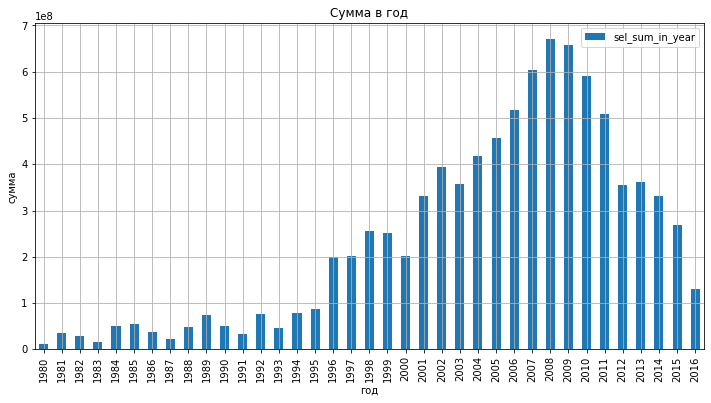

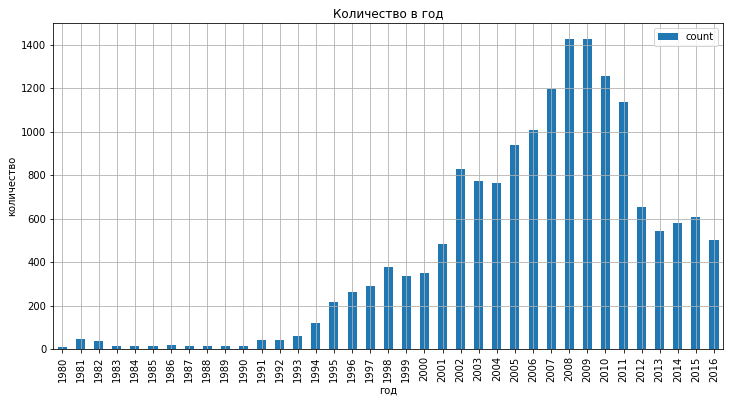

In [41]:
count_in_yars.plot.bar(y='sel_sum_in_year', grid=True, figsize=(12, 6))
plt.xlabel('год')
plt.ylabel('сумма')
plt.title('Сумма в год')
count_in_yars.plot.bar(y='count', grid=True, figsize=(12, 6))
plt.xlabel('год')
plt.ylabel('количество')
plt.title('Количество в год')
plt.show()

Из графиков видно, что пик индустрии был в 2008-2009 году. Выходила наибольшее количество игр, соответственно зарабатывалось наибольшее количество денег.  
На мой взгляд, важны данные, начиная с 1996 года. Хотя рост выпускаемых игр начался с 1995, зарабатывать на этом начали именно с 1996. С 2011 года года идёт падение. Если количество просело, но 2016 год почти на уровне 2013, то заработки неуклонно летят вниз.

Посмотрим, как менялись продажи по платформам:

In [42]:
platform_grouped_sales = games.groupby('platform').agg({'all_sales': ['count', 'sum']})

In [43]:
platform_grouped_sales.columns = ['count_sales', 'sum_sales']
platform_grouped_sales.sort_values(by='sum_sales', ascending=False)

,count_sales,sum_sales
platform,,
PS2,2161,1255769992
X360,1262,971419999
PS3,1331,939649995
Wii,1320,907509997
DS,2151,806120000
PS,1197,730859994
GBA,822,317849999
PS4,392,314139997
PSP,1209,294050000


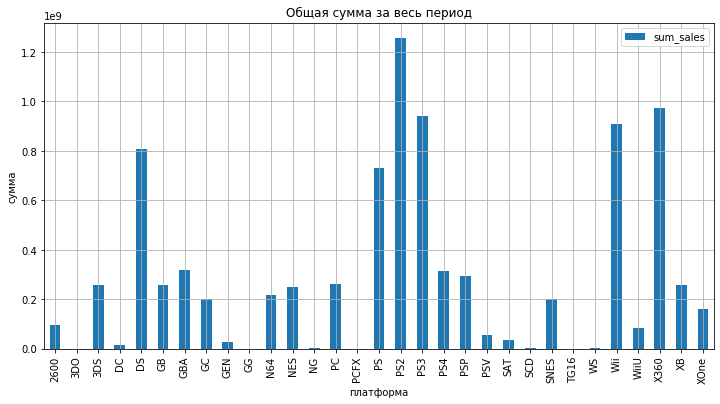

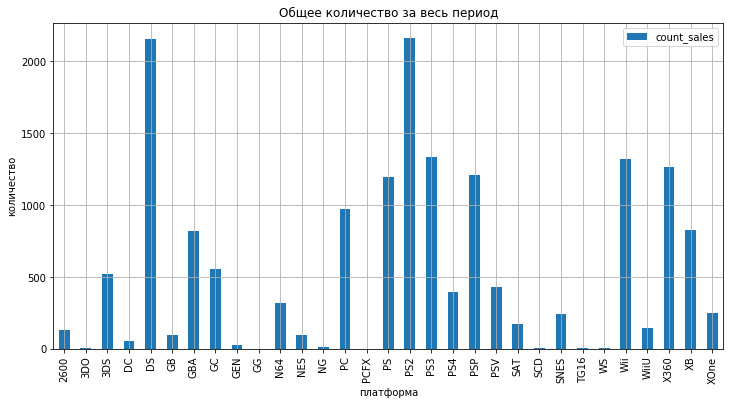

In [44]:
platform_grouped_sales.plot.bar(y='sum_sales', grid=True, figsize=(12, 6))
plt.xlabel('платформа')
plt.ylabel('сумма')
plt.title('Общая сумма за весь период')
platform_grouped_sales.plot.bar(y='count_sales', grid=True, figsize=(12, 6))
plt.xlabel('платформа')
plt.ylabel('количество')
plt.title('Общее количество за весь период')
plt.show()

Выберим платформы с наибольшими суммарными продажами. Это: PS2, X360, PS3, Wii, DS, PS, GBA, PS4, PSP, PC:

In [45]:
platform_grouped_sales = platform_grouped_sales.reset_index()
list_best_platform = list(platform_grouped_sales.query('sum_sales >= 259519998')['platform'])
list_best_platform

['DS', 'GBA', 'PC', 'PS', 'PS2', 'PS3', 'PS4', 'PSP', 'Wii', 'X360']

Вытащим эти платформы из основной таблицы:

In [46]:
import numpy as np

In [47]:
best_platform_games = games.query('platform in @list_best_platform')
best_platform_games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41360000,28960000,3770000,8450000,76,80,E,82540000
2,Mario Kart Wii,Wii,2008,Racing,15680000,12760000,3790000,3290000,82,83,E,35520000
3,Wii Sports Resort,Wii,2009,Sports,15610000,10930000,3280000,2950000,80,80,E,32770000
6,New Super Mario Bros.,DS,2006,Platform,11280000,9140000,6500000,2880000,89,85,E,29800000
7,Wii Play,Wii,2006,Misc,13960000,9180000,2930000,2840000,58,66,E,28910000
...,...,...,...,...,...,...,...,...,...,...,...,...
16708,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,10000,0,0,0,0,0,unknown,10000
16709,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0,0,0,0,0,0,unknown,0
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0,0,10000,0,0,0,unknown,10000
16711,LMA Manager 2007,X360,2006,Sports,0,10000,0,0,0,0,unknown,10000


Построим распределение по годам. Подготовим таблицу, сбросим индексы и прогоним в цикле по годам и платформам, выкинув нулевой год:

In [48]:
best_platform_games = best_platform_games.query('year_of_release != 0').groupby(['platform', 'year_of_release']).agg({'all_sales': 'sum'}).reset_index()

In [49]:
import seaborn as sns

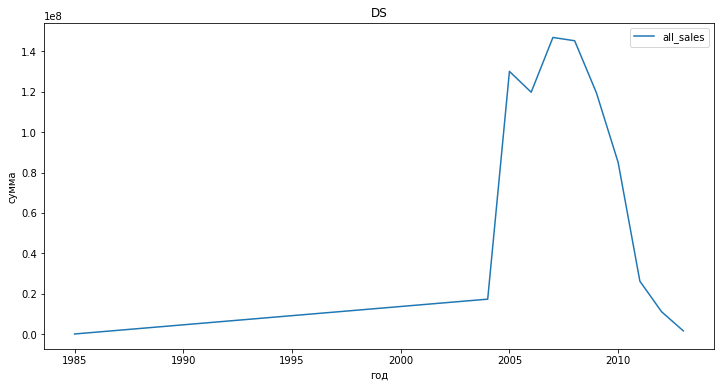

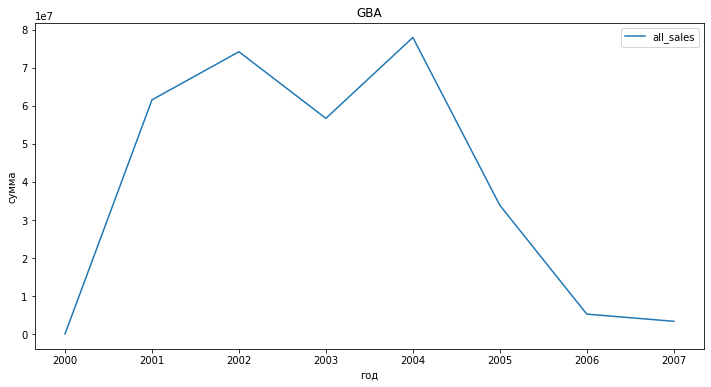

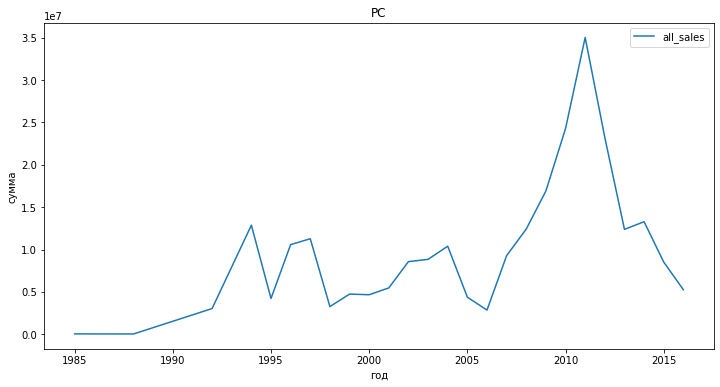

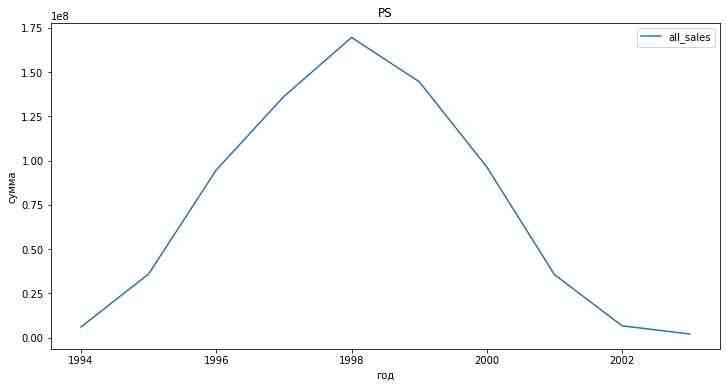

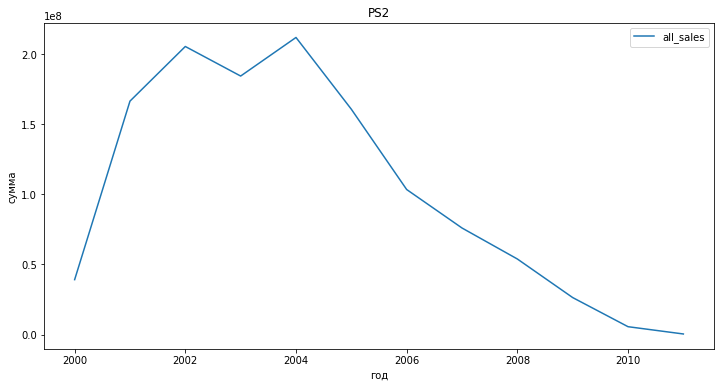

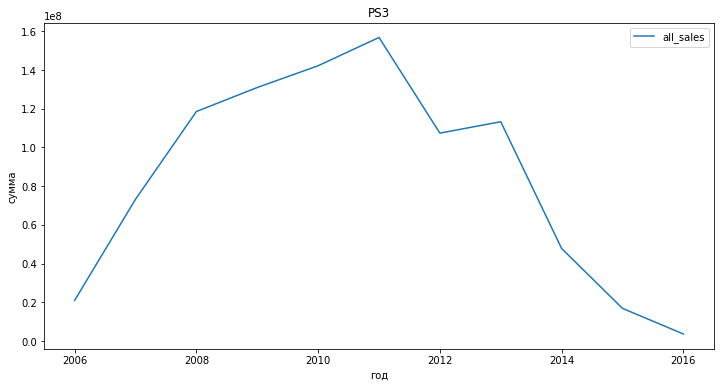

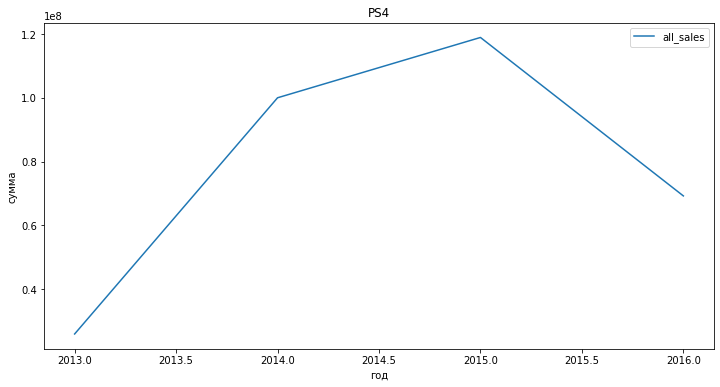

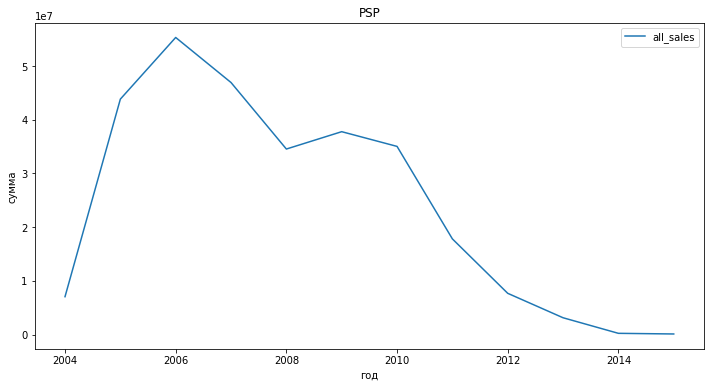

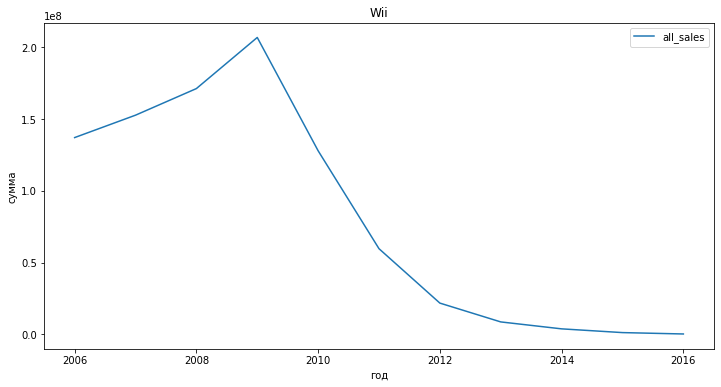

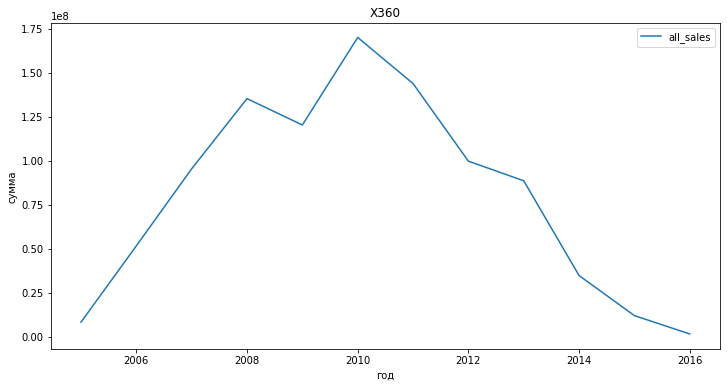

In [50]:
for i in list_best_platform:
    tmp = best_platform_games.query('platform == @i')
    tmp.plot(x='year_of_release', y='all_sales', figsize=(12, 6))
    plt.xlabel('год')
    plt.ylabel('сумма')
    plt.title(i)
    plt.show()

Из графиков видно, что большинство из выбранных платформ(7 из 10) появляютс и исчезают за 9-10 лет.

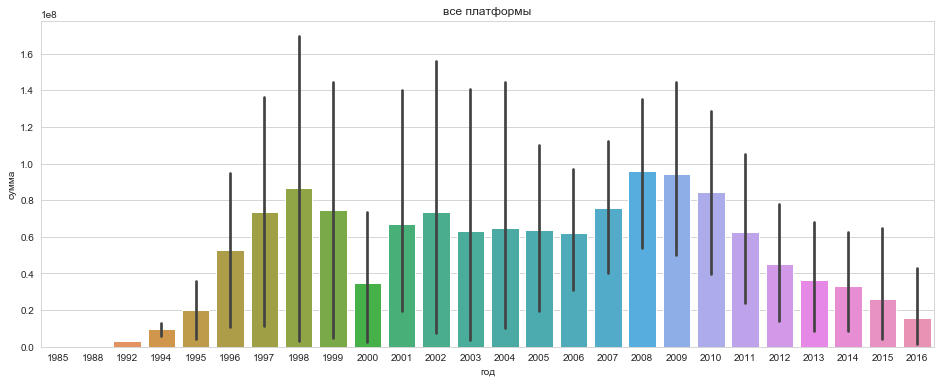

In [51]:
plt.figure(figsize=(16, 6))
sns.set_style('whitegrid')
sns.barplot(x=best_platform_games['year_of_release'], y=best_platform_games['all_sales'])
plt.xlabel('год')
plt.ylabel('сумма')
plt.title('все платформы')
plt.show()

Возьмём игры, вышедшие за 2016 год, чтобы опредилить актуальные платформы:

In [52]:
list_relevant_platform = list(games.query('year_of_release != 0 and year_of_release > 2015')['platform'].unique())
list_relevant_platform

['PS4', '3DS', 'XOne', 'WiiU', 'PS3', 'PC', 'X360', 'PSV', 'Wii']

In [53]:
relevant_platform = games.query('year_of_release != 0').groupby(['platform', 'year_of_release']).agg({'all_sales': 'sum'}).reset_index()

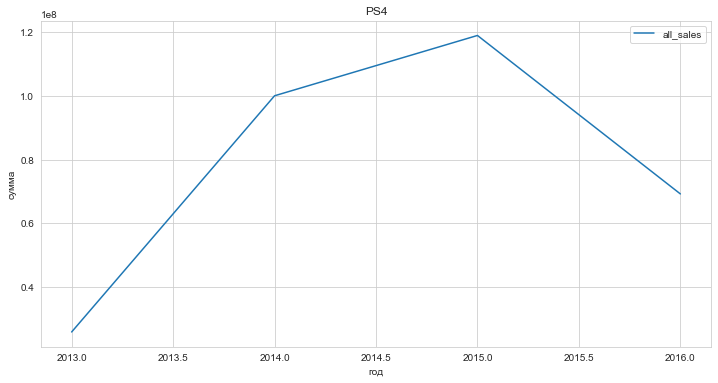

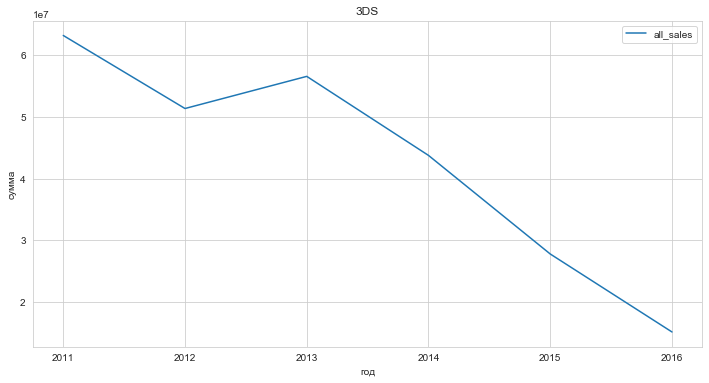

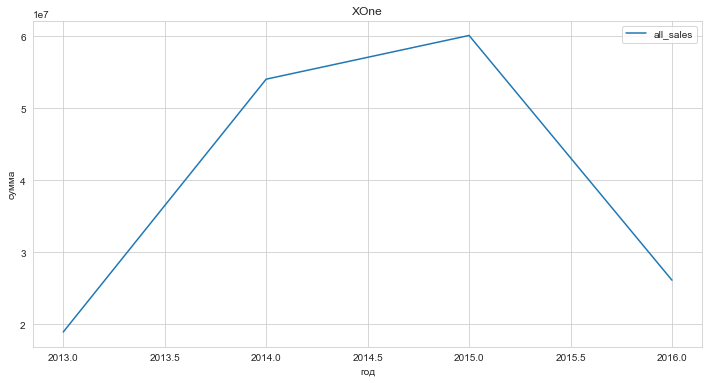

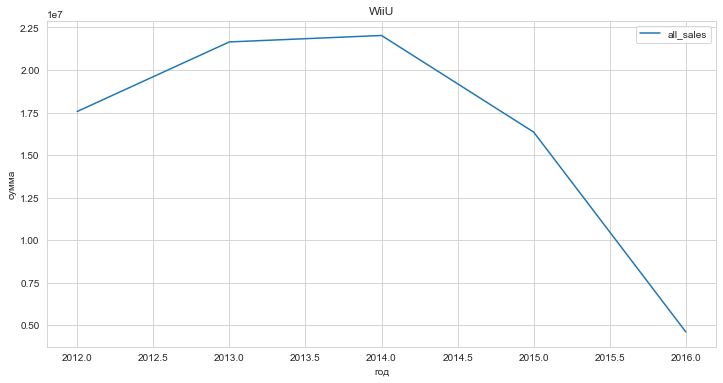

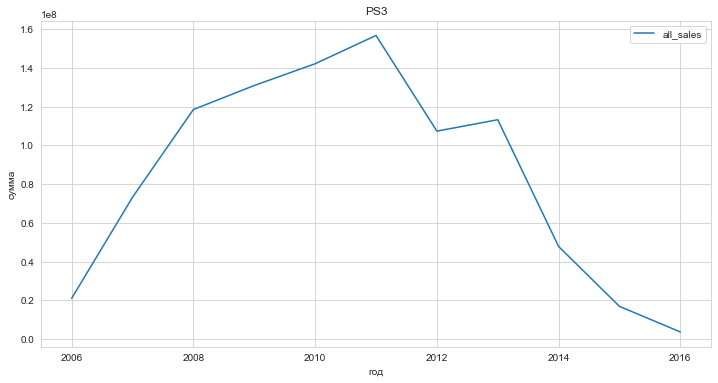

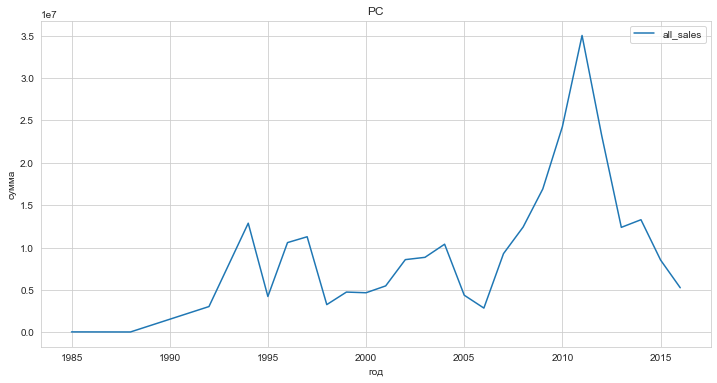

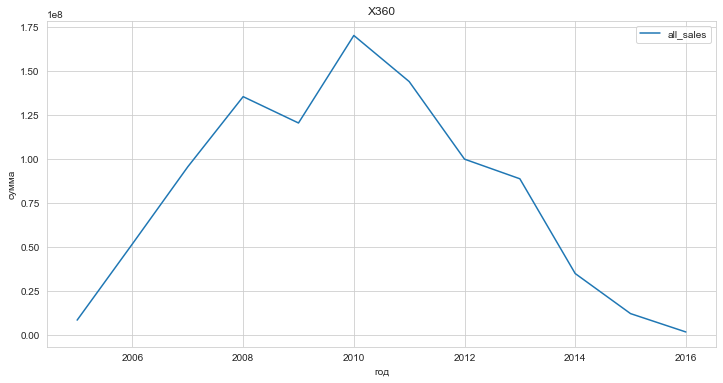

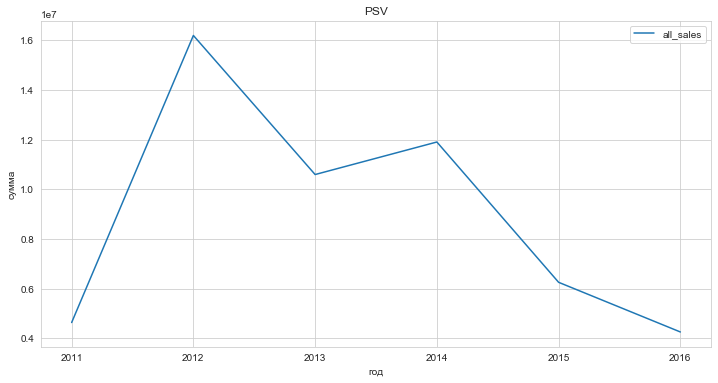

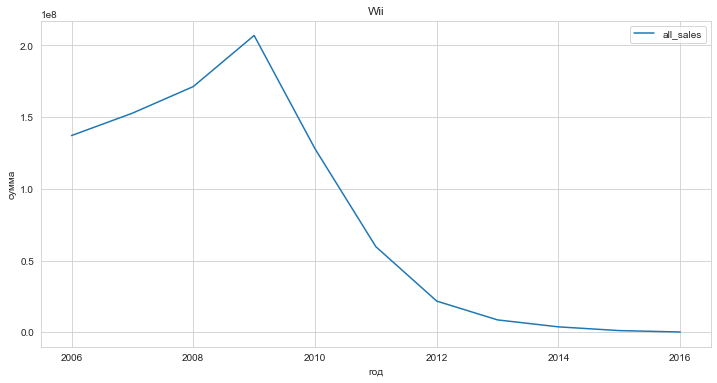

In [54]:
list_relevant_platform_min_year = []
for i in list_relevant_platform:
    tmp = (games
               .query('year_of_release != 0 and platform == @i')
               .groupby(['platform', 'year_of_release'])
               .agg({'all_sales': 'sum'})
               .reset_index()
          )
    tmp.plot(x='year_of_release', y='all_sales', figsize=(12, 6))
    plt.xlabel('год')
    plt.ylabel('сумма')
    plt.title(i)
    plt.show()
    list_relevant_platform_min_year.append(tmp['year_of_release'].min())

In [55]:
print(f'Видно, что первые игры на актуальных платформах вышли в годы: {list_relevant_platform_min_year}')

Видно, что первые игры на актуальных платформах вышли в годы: [2013, 2011, 2013, 2012, 2006, 1985, 2005, 2011, 2006]


Возьмём средний год выхода, за исключением PC, т.к. это скорее исключение.

In [56]:
sum_year = 0
for i in range(len(list_relevant_platform_min_year)):
    sum_year += list_relevant_platform_min_year[i]
sum_year -= 1985
mean_year = sum_year / 8
print('Средний год получается {:.0f}'.format(mean_year))
relevant_year = 2016 - mean_year
print('Получается актуальный период в {:.0f} лет.'.format(relevant_year))

Средний год получается 2010
Получается актуальный период в 6 лет.


In [57]:
games_current_period = games.query('year_of_release > 2010')
games_current_period

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
16,Grand Theft Auto V,PS3,2013,Action,7020000,9090000,980000,3960000,97,82,M,21050000
23,Grand Theft Auto V,X360,2013,Action,9660000,5140000,60000,1410000,97,81,M,16270000
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9040000,4240000,130000,1320000,88,34,M,14730000
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6030000,5860000,360000,2380000,0,0,unknown,14630000
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5280000,4190000,4350000,780000,0,0,unknown,14600000
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0,0,10000,0,0,0,unknown,10000
16707,Aiyoku no Eustia,PSV,2014,Misc,0,0,10000,0,0,0,unknown,10000
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0,0,10000,0,0,0,unknown,10000
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0,0,10000,0,0,0,unknown,10000


Создадим список платформ за эти годы:

In [58]:
list_platform_current_years = list(games_current_period['platform'].unique())
list_platform_current_years

['PS3',
 'X360',
 'PS4',
 '3DS',
 'Wii',
 'DS',
 'XOne',
 'WiiU',
 'PC',
 'PSV',
 'PSP',
 'PS2']

Сгруппируем таблицу продаж для графика за эти годы по платформам и годам:

In [59]:
games_current_period_grouped = games_current_period.groupby(['platform', 'year_of_release']).agg({'all_sales': 'sum'}).reset_index()
games_current_period_grouped

,platform,year_of_release,all_sales
0,3DS,2011,63199998
1,3DS,2012,51359999
2,3DS,2013,56570000
3,3DS,2014,43760000
4,3DS,2015,27780000
5,3DS,2016,15140000
6,DS,2011,26180000
7,DS,2012,11010000
8,DS,2013,1540000
9,PC,2011,35030000


Посмотрим на график продаж платформ за эти годы:

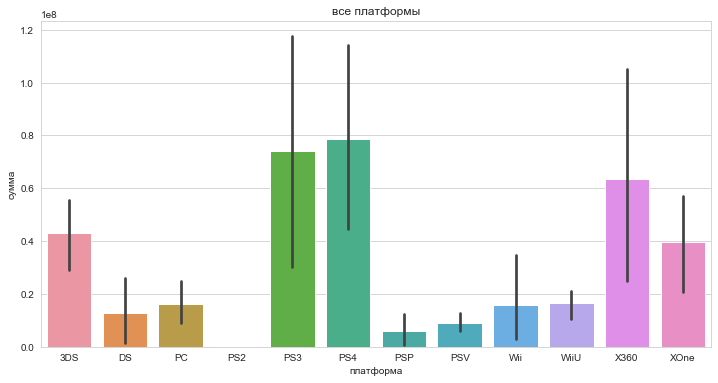

In [60]:
plt.figure(figsize=(12, 6))
sns.set_style('whitegrid')
sns.barplot(x=games_current_period_grouped['platform'], y=games_current_period_grouped['all_sales'])
plt.xlabel('платформа')
plt.ylabel('сумма')
plt.title('все платформы')
plt.show()

In [61]:
list_lid_sels = list(games_current_period_grouped.query('all_sales > 100000000')['platform'].unique())
print(f'По продажам лидируют платформы: {list_lid_sels}')

По продажам лидируют платформы: ['PS3', 'PS4', 'X360']


Посмотрим, растут их продажи или падают:

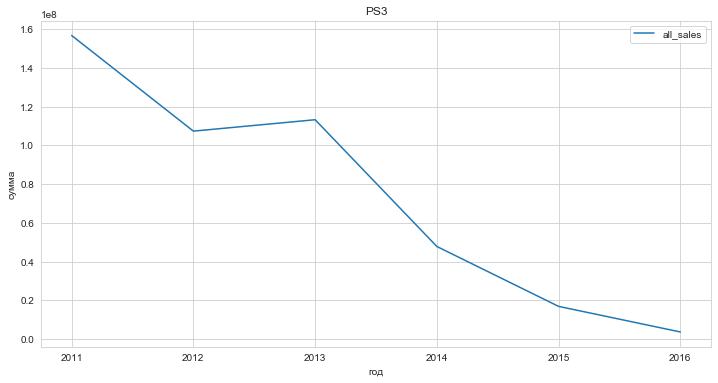

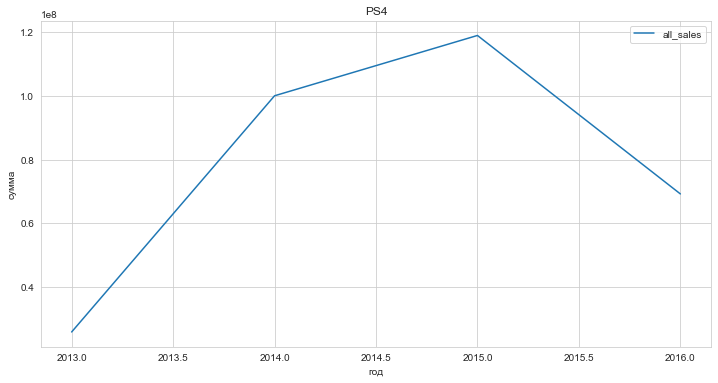

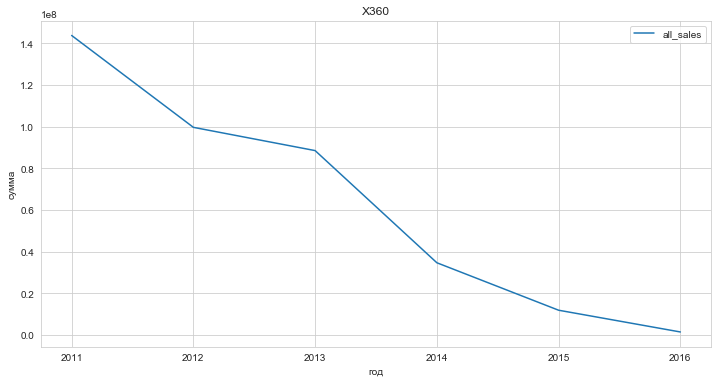

In [62]:
for i in list_lid_sels:
    tmp = games_current_period_grouped.query('platform == @i')
    tmp.plot(x='year_of_release', y='all_sales', figsize=(12, 6))
    plt.xlabel('год')
    plt.ylabel('сумма')
    plt.title(i)
    plt.show()

Продажы X360 и PS3 падают. PS4 пока чувствует себя не плохо.

Посмотрим на общую картину продаж в актуальный период по платформам:

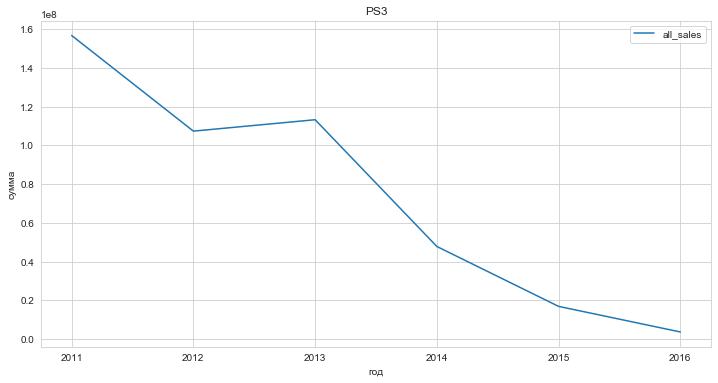

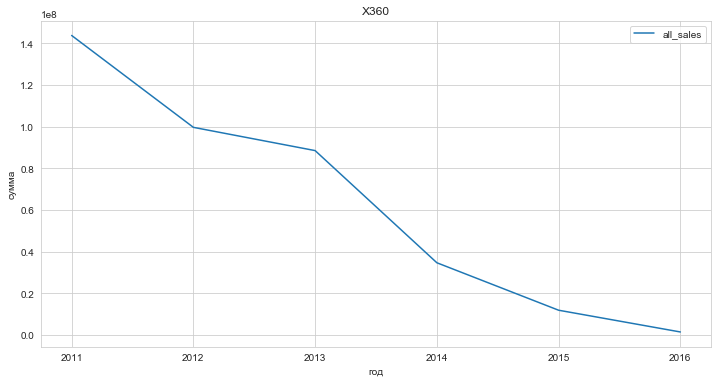

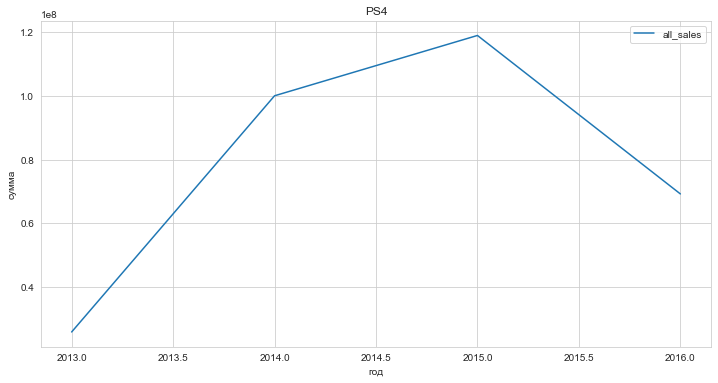

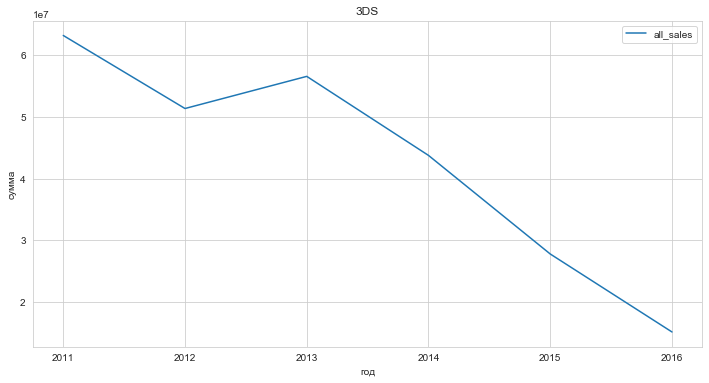

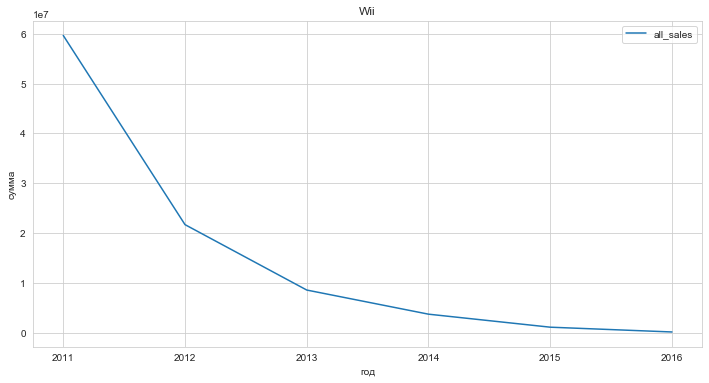

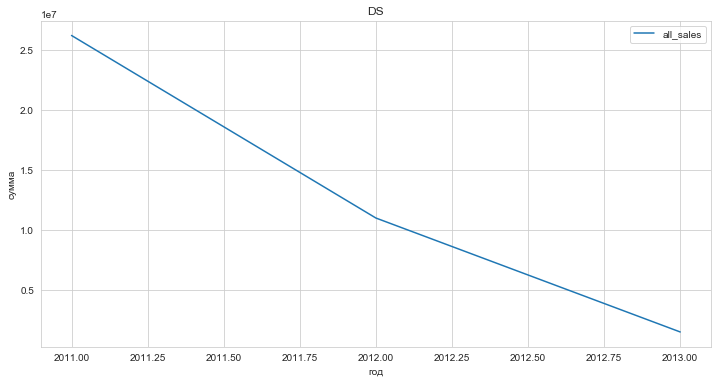

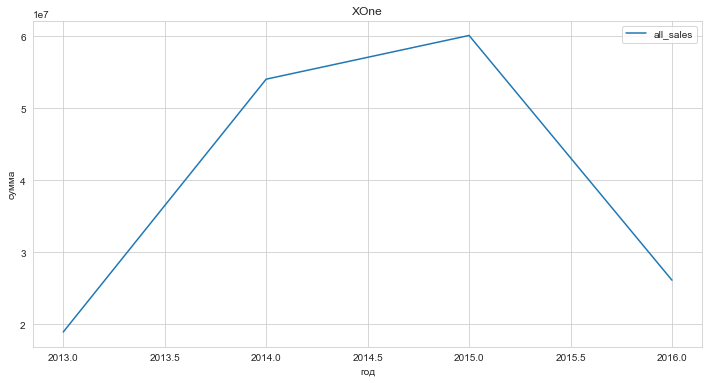

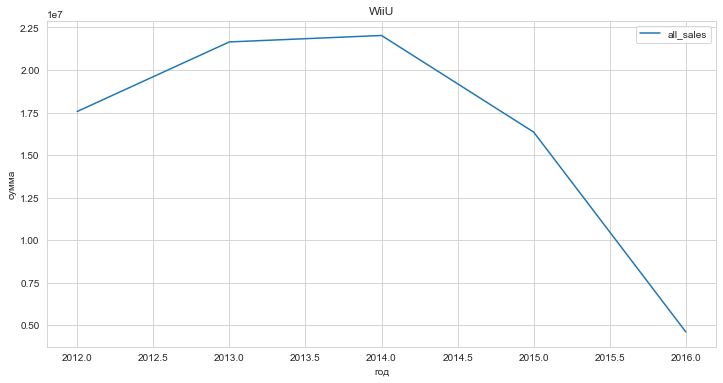

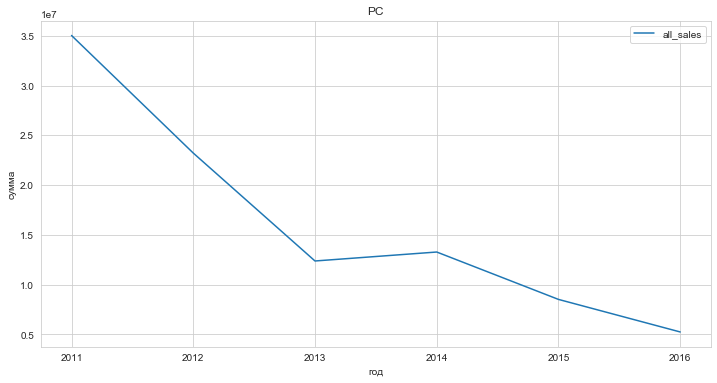

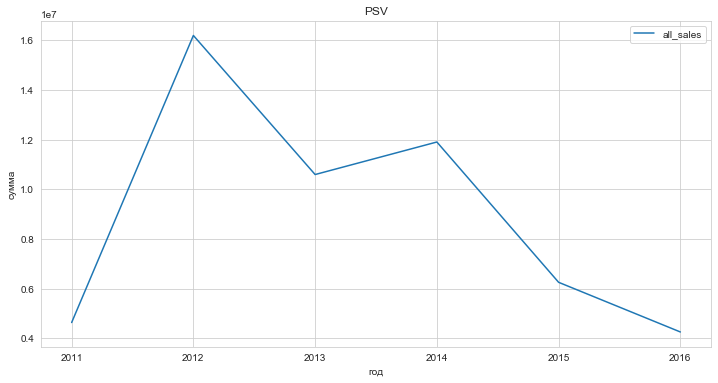

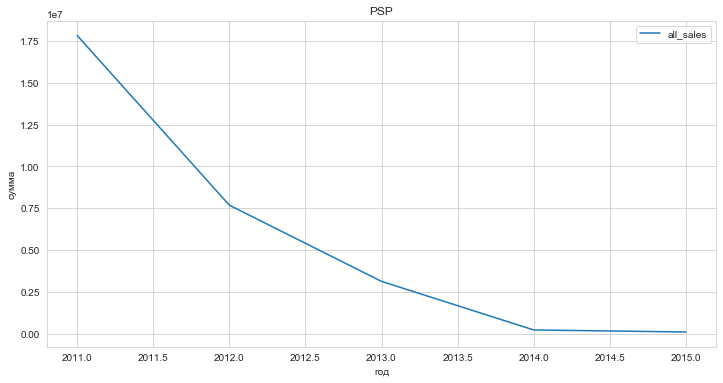

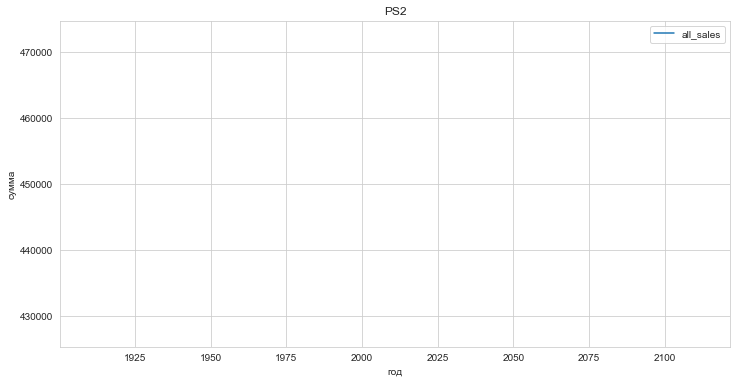

In [63]:
for i in list_platform_current_years:
    tmp = games_current_period_grouped.query('platform == @i')
    tmp.plot(x='year_of_release', y='all_sales', figsize=(12, 6))
    plt.xlabel('год')
    plt.ylabel('сумма')
    plt.title(i)
    plt.show()

Из графиков видно:   
- Wii - упала
- X360 - почти упала
- PS3 - почти упала
- DS - упала
- PS4 - растёт
- 3DS - растёт
- PC - скорее всего не упадёт, т.к. ПК будет жить вечно =)
- XOne - растёт
- WiiU - почти упала
- PSP - упала
- PS2 - упала
- PSV - растёт
- XB - упала
- DC - упала

Выберем несколько потенциально прибыльных платформ:  
- PSV
- PS4
- PC
- XOne  

Построим график «ящик с усами» по глобальным продажам каждой игры и разбивкой по потенциально прибыльным платформам:

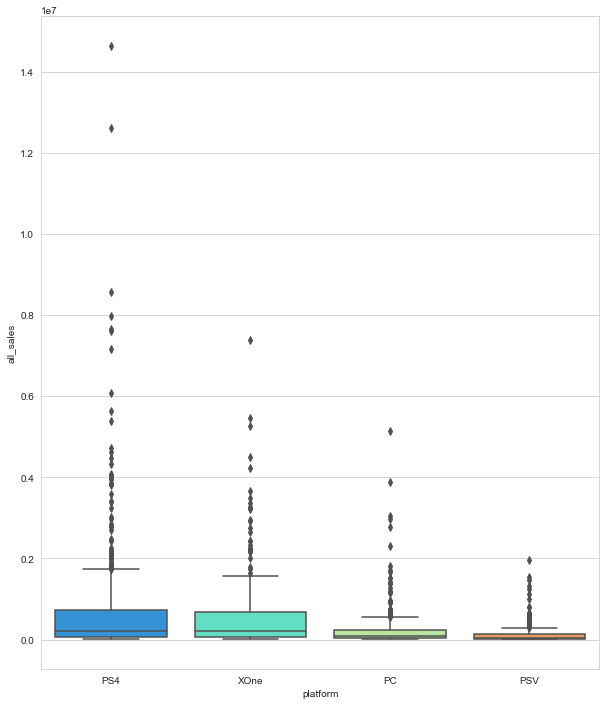

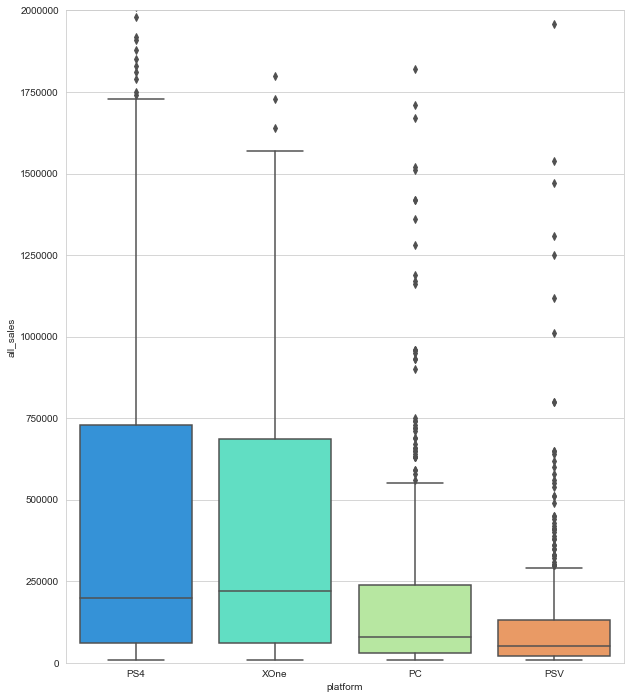

In [64]:
games_current_period_promising_platforms = games_current_period.query('platform == "PSV" or platform == "PS4" or platform == "PC" or platform == "XOne"')
plt.figure(figsize=(10, 12))
sns.boxplot(x=games_current_period_promising_platforms['platform'], y=games_current_period_promising_platforms['all_sales'], palette='rainbow')
plt.show()
plt.figure(figsize=(10, 12))
plt.ylim(0, 2000000)
sns.boxplot(x=games_current_period_promising_platforms['platform'], y=games_current_period_promising_platforms['all_sales'], palette='rainbow')
plt.show()

Отбросим выбросы и посмотрим на распределение:

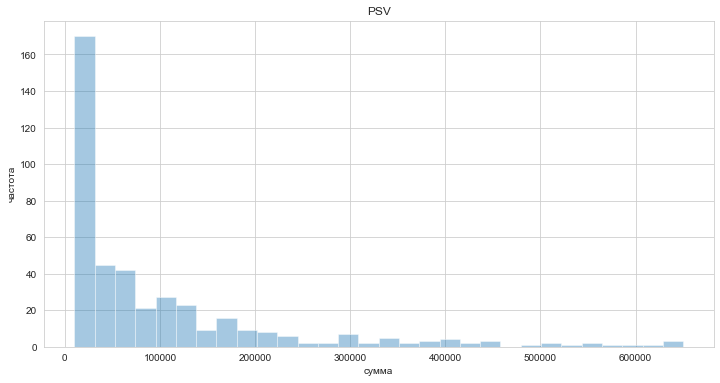

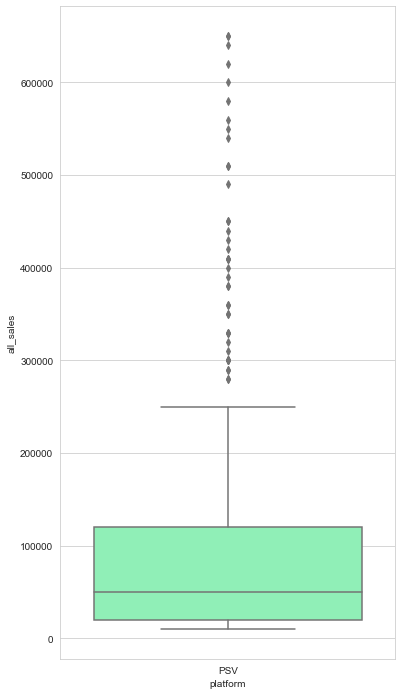

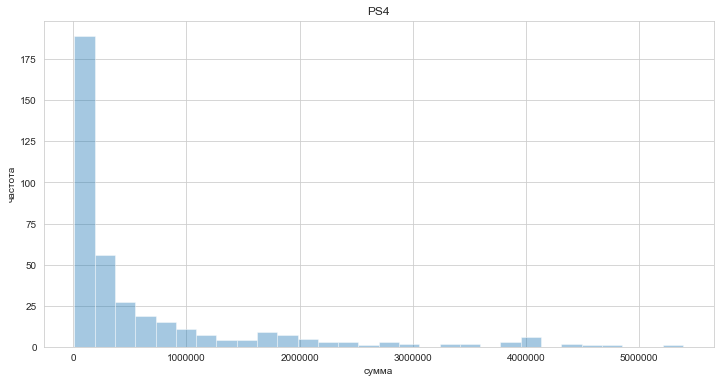

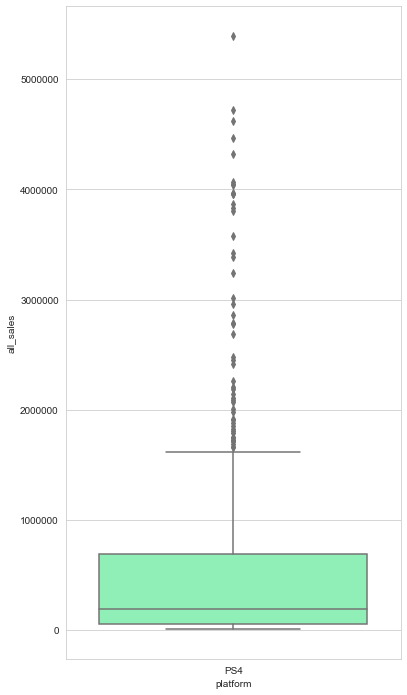

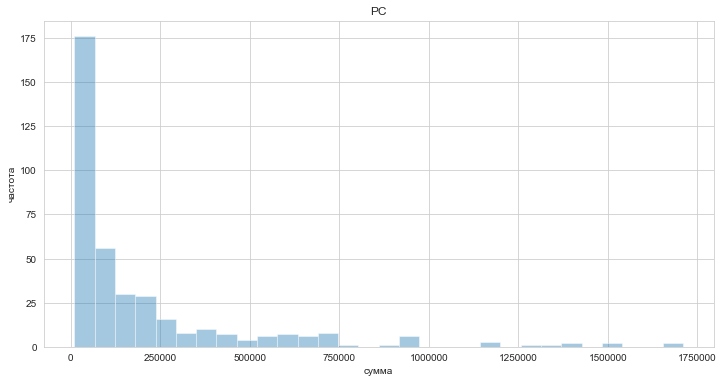

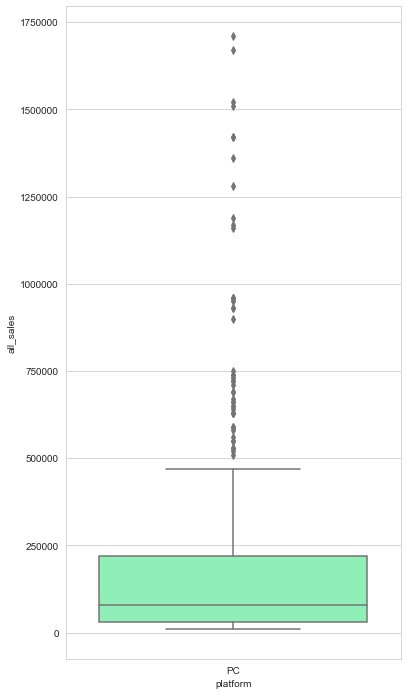

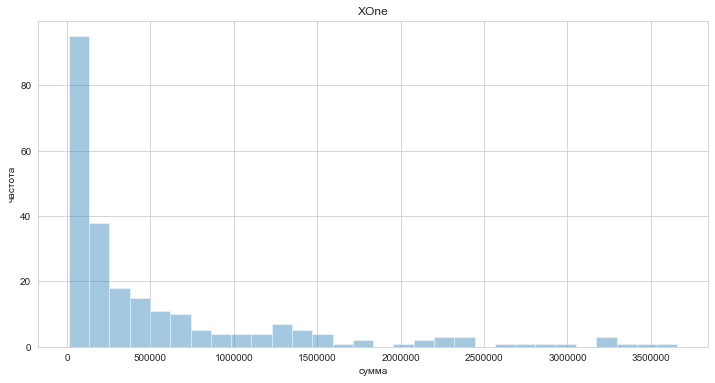

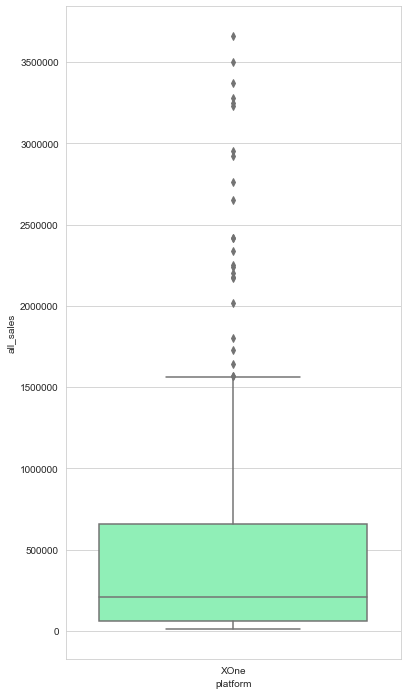

In [65]:
list_promising_platforms = ['PSV', 'PS4', 'PC', 'XOne']
for i in list_promising_platforms:
    tmp = games_current_period_promising_platforms.query('platform == @i')
    maximum = tmp['all_sales'].mean() + (3 * np.std(tmp['all_sales']))
    tmp = tmp.query('0 < all_sales < @maximum')
    plt.figure(figsize=(12, 6))
    sns.distplot(tmp['all_sales'], kde=False, bins=30)
    plt.title(i)
    plt.xlabel('сумма')
    plt.ylabel('частота')
    plt.show()
    plt.figure(figsize=(6, 12))
    sns.boxplot(x=tmp['platform'], y=tmp['all_sales'], palette='rainbow')
    plt.show()

Оценим разницу в продажах:

In [66]:
for i in list_promising_platforms:
    tmp = games_current_period_promising_platforms.query('platform == @i')
    maximum = tmp['all_sales'].mean() + (3 * np.std(tmp['all_sales']))
    tmp = tmp.query('0 < all_sales < @maximum')
    print(i)
    print('median   ', tmp['all_sales'].median())
    print(tmp['all_sales'].describe())
    print()

PSV
median    50000.0
count       420.000000
mean     101309.523810
std      124834.781139
min       10000.000000
25%       20000.000000
50%       50000.000000
75%      120000.000000
max      650000.000000
Name: all_sales, dtype: float64

PS4
median    190000.0
count    3.830000e+02
mean     6.166580e+05
std      9.864401e+05
min      1.000000e+04
25%      6.000000e+04
50%      1.900000e+05
75%      6.900000e+05
max      5.390000e+06
Name: all_sales, dtype: float64

PC
median    80000.0
count    3.820000e+02
mean     1.982723e+05
std      2.934582e+05
min      1.000000e+04
25%      3.000000e+04
50%      8.000000e+04
75%      2.200000e+05
max      1.710000e+06
Name: all_sales, dtype: float64

XOne
median    210000.0
count    2.420000e+02
mean     5.474793e+05
std      7.734215e+05
min      1.000000e+04
25%      6.000000e+04
50%      2.100000e+05
75%      6.600000e+05
max      3.660000e+06
Name: all_sales, dtype: float64



Разница в продажах имеется:  
- XOne медиана - 21000, среднее - 54748. Лидирует. Среднее превышает более, чем в медиану.
- PS4 медиана  - 19000, среднее - 61666. Второе место. Среднее превышает медиану более, чем в 3 раза и по медианге - это первое место.
- PC медиана   - 8000, среднее  - 17801. Третее место. Среднее превышает медиану чуть более, чем в 2 раза.
- PSV медиана  - 5000, среднее  - 10131. Четвёртое место. Среднее больше медианы в 2 раза.

Лидирующая в ппродажах платформа XOne превышает PSV более, чем в 4 раза по средним показателям и более чем в 5 раз по медиане.  

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков:

In [67]:
games_current_period_XOne = games_current_period_promising_platforms.query('platform == "XOne" and user_score != 0 and critic_score != 0')
games_current_period_XOne

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
165,Grand Theft Auto V,XOne,2014,Action,2810000,2190000,0,470000,97,79,M,5470000
179,Call of Duty: Advanced Warfare,XOne,2014,Shooter,3220000,1550000,10000,480000,81,54,M,5260000
242,Halo 5: Guardians,XOne,2015,Shooter,2780000,1270000,30000,410000,84,64,T,4490000
270,Fallout 4,XOne,2015,Role-Playing,2510000,1320000,10000,380000,88,62,M,4220000
373,Assassin's Creed: Unity,XOne,2014,Action,2270000,900000,0,330000,72,41,M,3500000
...,...,...,...,...,...,...,...,...,...,...,...,...
16322,Agatha Christie's The ABC Murders,XOne,2016,Adventure,10000,0,0,0,66,75,unknown,10000
16392,Goat Simulator,XOne,2016,Simulation,0,10000,0,0,53,63,T,10000
16597,Saints Row: Gat out of Hell,XOne,2015,Action,0,10000,0,0,65,60,M,10000
16630,Sébastien Loeb Rally Evo,XOne,2016,Racing,0,10000,0,0,63,82,E,10000


Сгруппируем по продажам:

In [68]:
games_current_period_XOne_grouped = games_current_period_XOne.groupby('all_sales').agg({'critic_score': 'median', 'user_score': 'median'}).reset_index()
games_current_period_XOne_grouped

,all_sales,critic_score,user_score
0,10000,65.0,67.0
1,20000,65.0,71.0
2,30000,74.0,80.0
3,40000,82.5,70.0
4,50000,48.0,52.0
...,...,...,...
96,3500000,72.0,41.0
97,4220000,88.0,62.0
98,4490000,84.0,64.0
99,5260000,81.0,54.0


Построим диаграмму рассеяния для зависимости продаж от оценок критиков:

In [69]:
maximum_all_sales = games_current_period_XOne_grouped['all_sales'].mean() + (3 * np.std(games_current_period_XOne_grouped['all_sales']))
games_current_period_XOne_grouped = games_current_period_XOne_grouped.query('0 < all_sales < @maximum_all_sales')

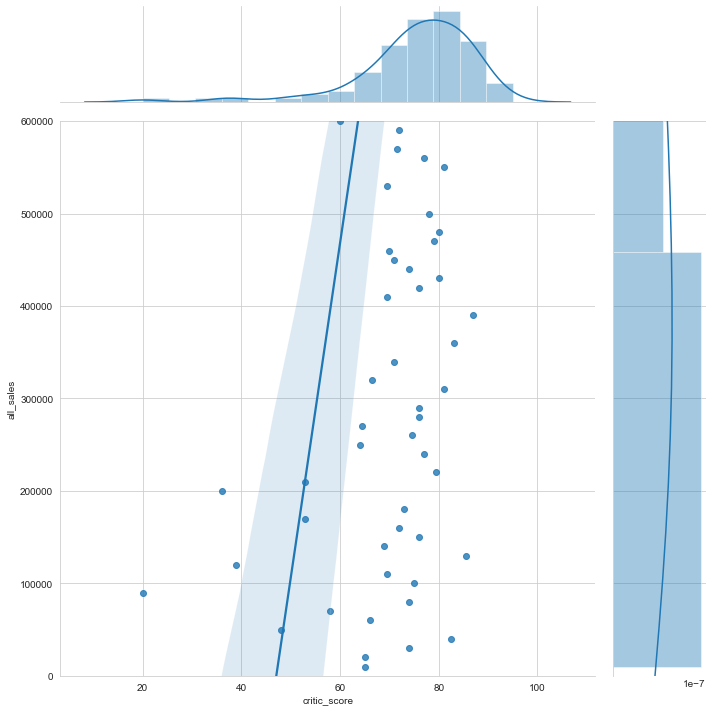

In [70]:
sns.jointplot(x='critic_score', y='all_sales', data=games_current_period_XOne_grouped, kind='reg', ylim=(0, 600000), height=10)
plt.show()

По графику видно, что начиная примерно от оценки 70, продажи варианты значения выше. Посмотрим на коэффициент корреляции:

In [71]:
games_current_period_XOne_grouped['all_sales'].corr(games_current_period_XOne_grouped['critic_score'])

0.4257131973821315

Средняя зависимость присутвует.

Построим диаграмму рассеяния для зависимости продаж от оценок пользователей:

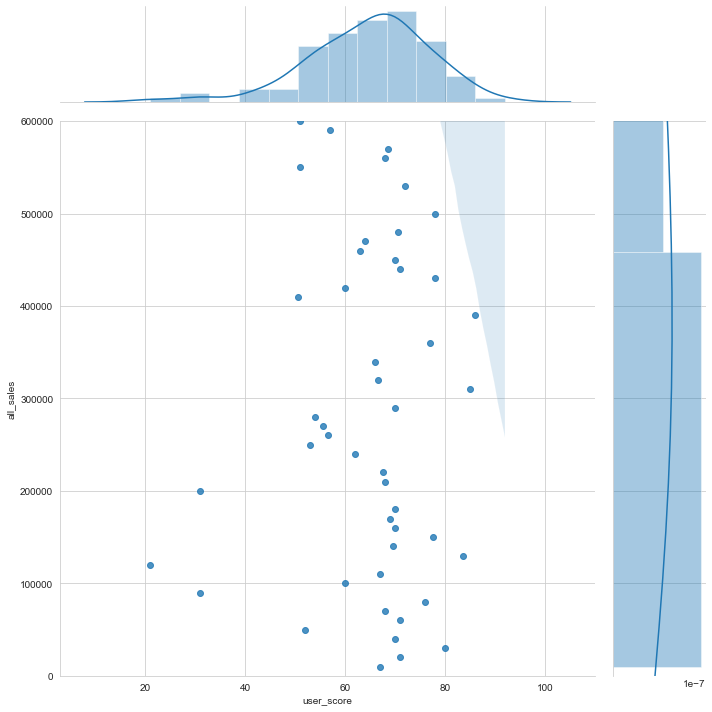

In [72]:
sns.jointplot(x='user_score', y='all_sales', data=games_current_period_XOne_grouped, kind='reg', ylim=(0, 600000), height=10)

По графику видно, что начиная с оценки 40, игры могут стоить дороже, но оценка 40 - слабовата.  
Посмотрим на коэффициент корреляции:

In [73]:
games_current_period_XOne_grouped['all_sales'].corr(games_current_period_XOne_grouped['user_score'])

-0.1070905931243634

Коэффициент очень слабый. Зависимость почти нулевая.  
Можно сделать вывод, что продажи зависят от оценок критиков в том случае, если оценки критиков переваливают за 70.  
Посмотрим на оставшиеся популярные платформы:

In [74]:
list_promising_platforms.pop()

'XOne'

                                      PSV


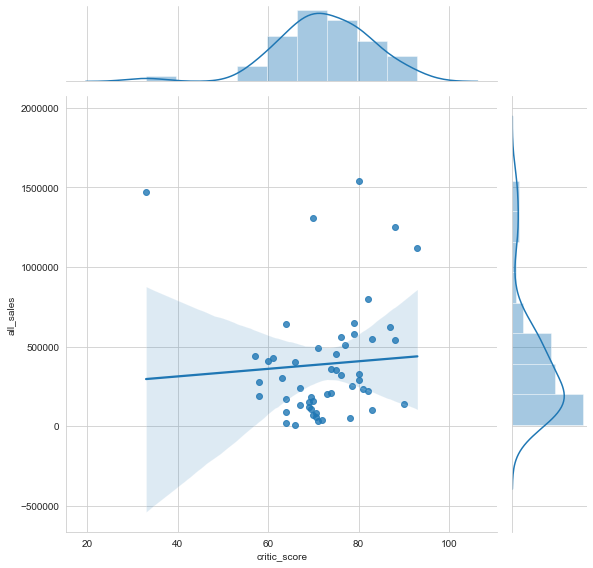

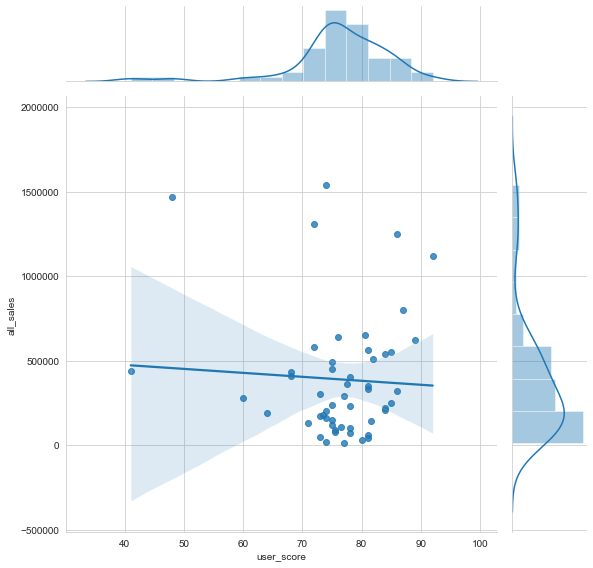

                                      PS4


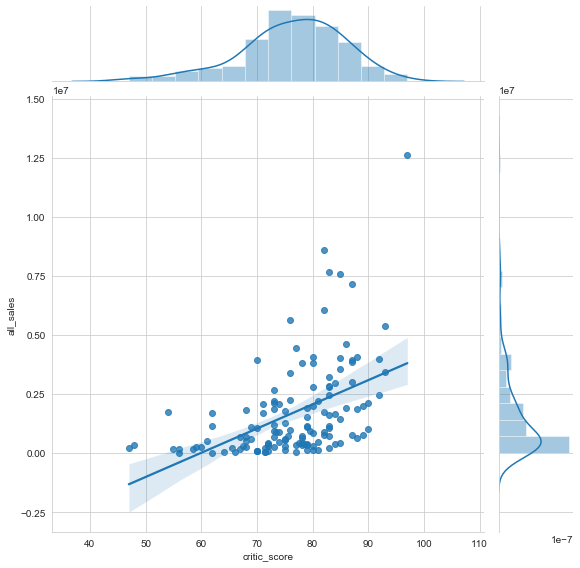

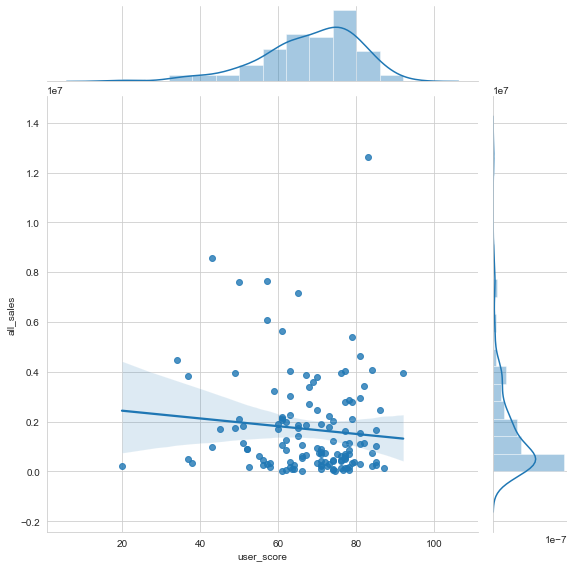

                                      PC


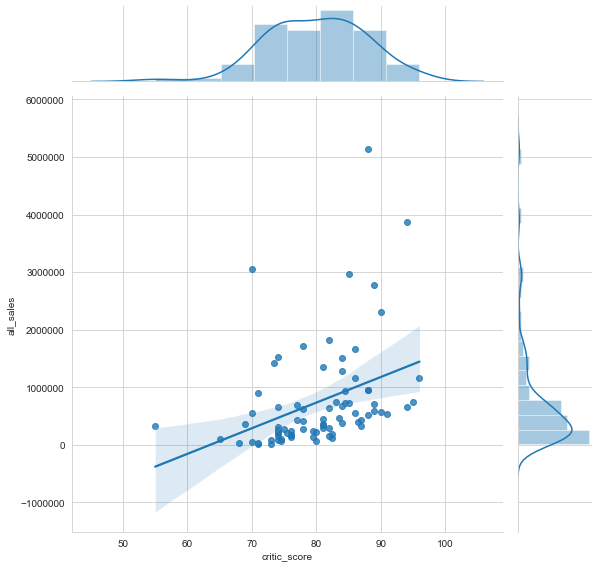

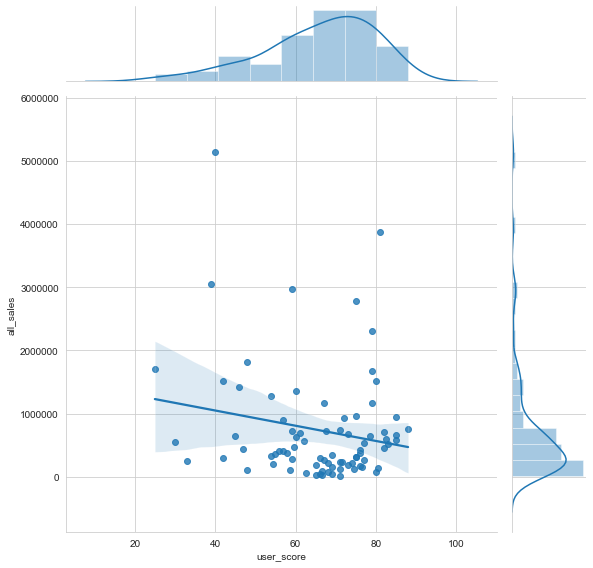

In [75]:
for i in list_promising_platforms:
    print('                                      ' + i)
    tmp = (games_current_period_promising_platforms
               .query('platform == @i and user_score != 0 and critic_score != 0')
               .groupby('all_sales').agg({'critic_score': 'median', 'user_score': 'median'})
               .reset_index()
          )
    sns.jointplot(x='critic_score', y='all_sales', data=tmp, kind='reg', height=8)  # , ylim=(0, 800000)
    sns.jointplot(x='user_score', y='all_sales', data=tmp, kind='reg', height=8)
    plt.show()

Посмотрим на коэффициенты корреляции:

In [76]:
for i in list_promising_platforms:
    tmp = (games_current_period_promising_platforms
               .query('platform == @i and user_score != 0 and critic_score != 0')
               .groupby('all_sales').agg({'critic_score': 'median', 'user_score': 'median'})
               .reset_index()
          )
    corr_critic_score = tmp['all_sales'].corr(tmp['critic_score'])
    print('Коэффициент корреляции ' + i + ' оценки критоиков и продаж: ' + str(corr_critic_score))
    corr_user_score = tmp['all_sales'].corr(tmp['user_score'])
    print('Коэффициент корреляции ' + i + ' оценки пользователей и продаж: ' + str(corr_user_score))
    print()

Коэффициент корреляции PSV оценки критоиков и продаж: 0.06602877832720112
Коэффициент корреляции PSV оценки пользователей и продаж: -0.05623898840897325

Коэффициент корреляции PS4 оценки критоиков и продаж: 0.4800809044463604
Коэффициент корреляции PS4 оценки пользователей и продаж: -0.09697937847413336

Коэффициент корреляции PC оценки критоиков и продаж: 0.3696233106544903
Коэффициент корреляции PC оценки пользователей и продаж: -0.18570441694492398



Из графиков и коэффициентов корреляции видно, что продажи зависят от оценки критиков(кроме PSV, где все оценки почти не влияют на прожажи) средне и не зависят от оценок пользователей. Вывод совпадает с предыдущей платформой.  

Посмотрим на общее распределение продаж игр по жанрам. Создадим список жанров:

<font color='green'>Итак, графики зависимости построены, взаимосвязь оценок и продаж установлено. Действительно, на продажи влияют лишь оценки критиков. 

In [77]:
list_genre = list(games['genre'].unique())
list_genre

['Sports',
 'Platform',
 'Racing',
 'Role-Playing',
 'Puzzle',
 'Misc',
 'Shooter',
 'Simulation',
 'Action',
 'Fighting',
 'Adventure',
 'Strategy']

Посмотрим на распределение, откуинув выбросы по правилу трёх сигм:

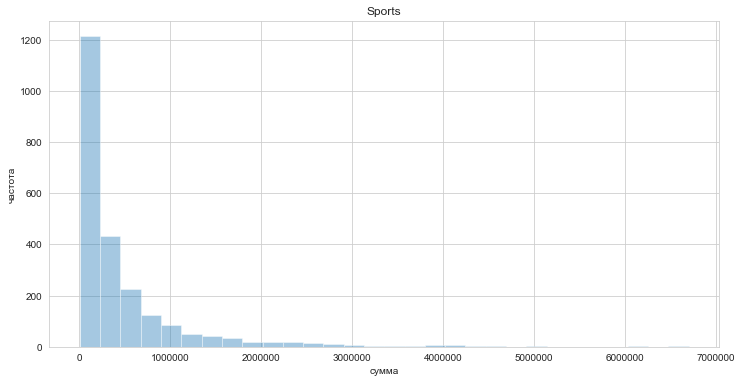

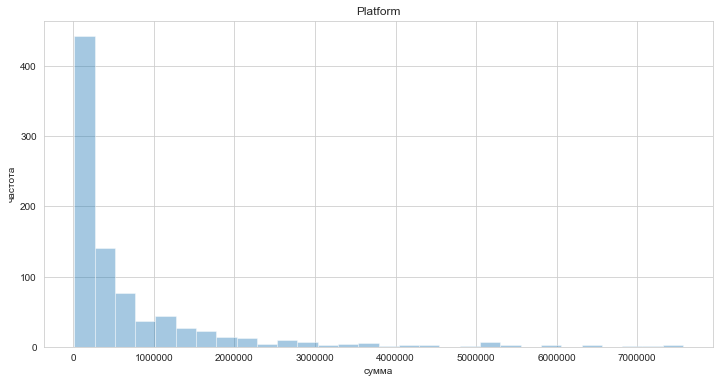

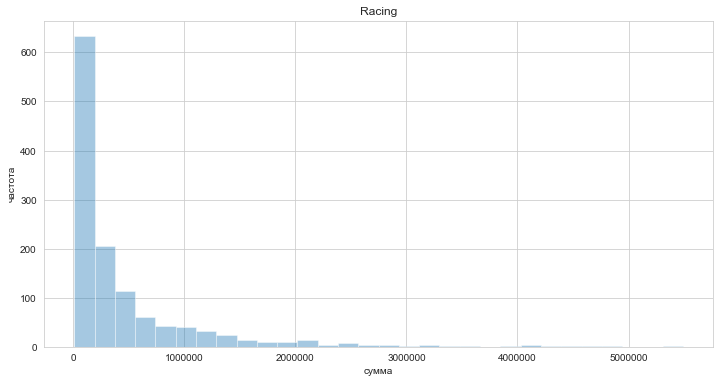

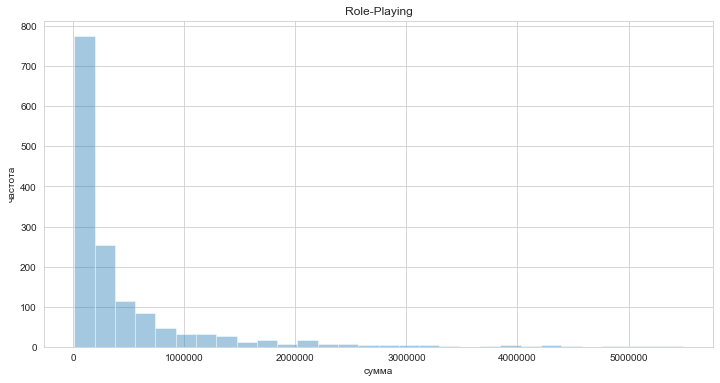

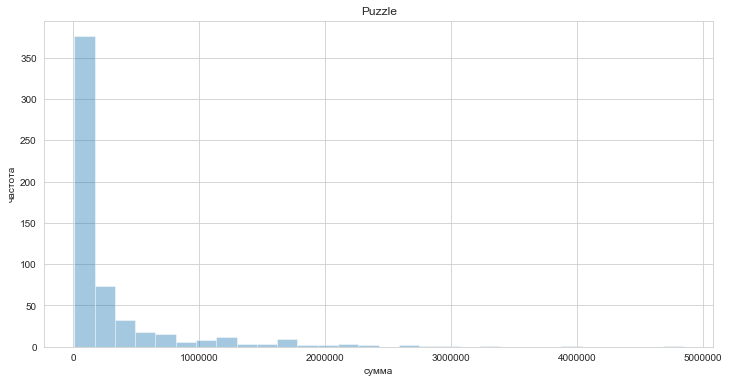

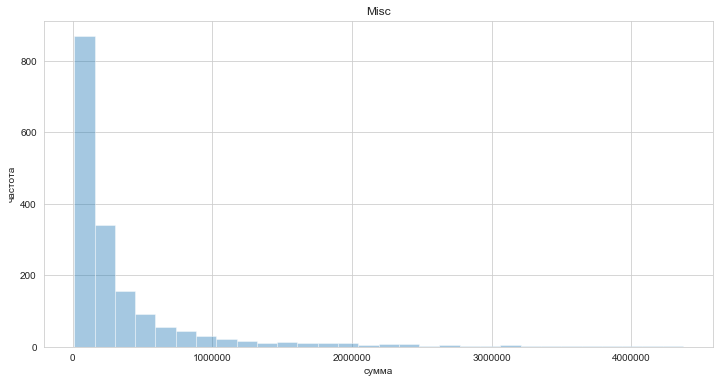

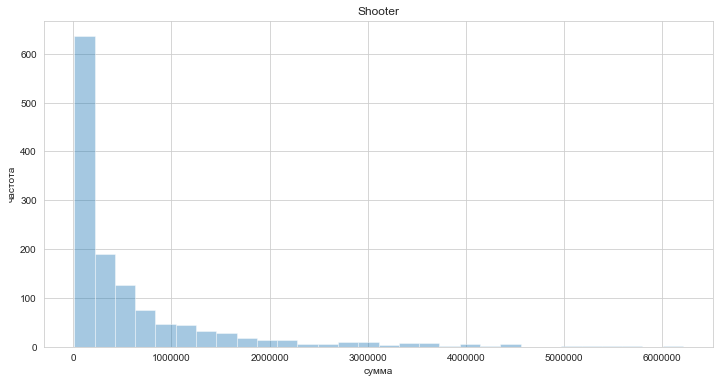

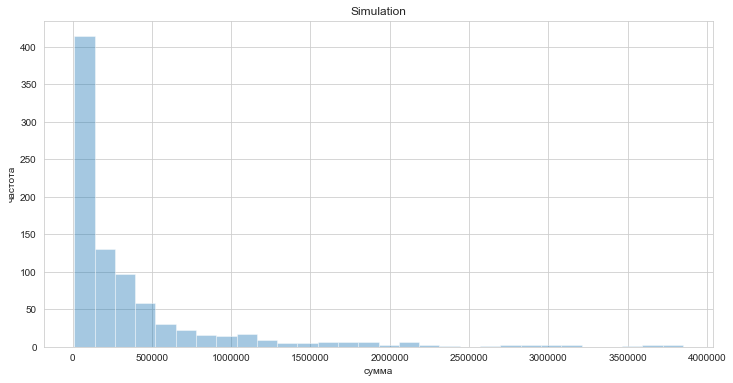

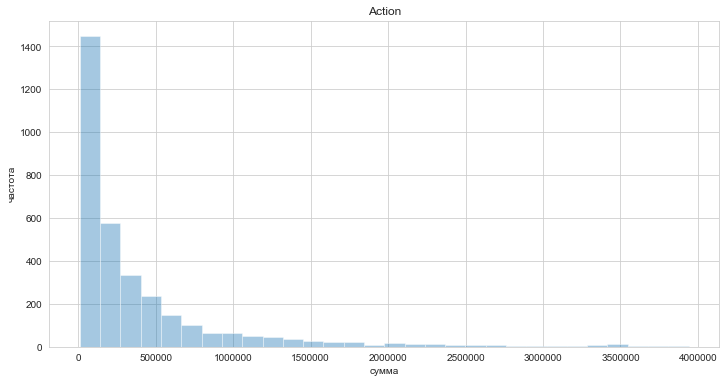

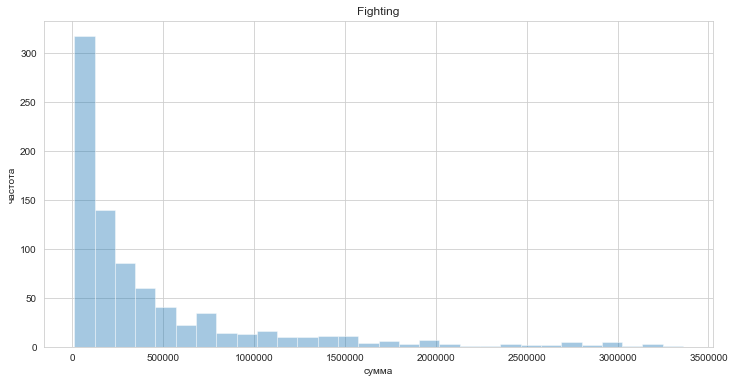

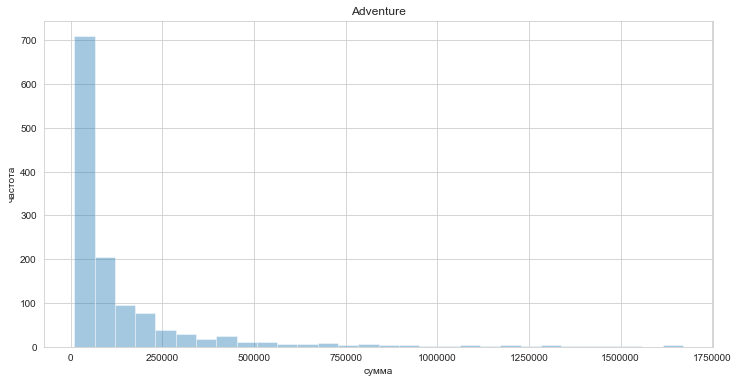

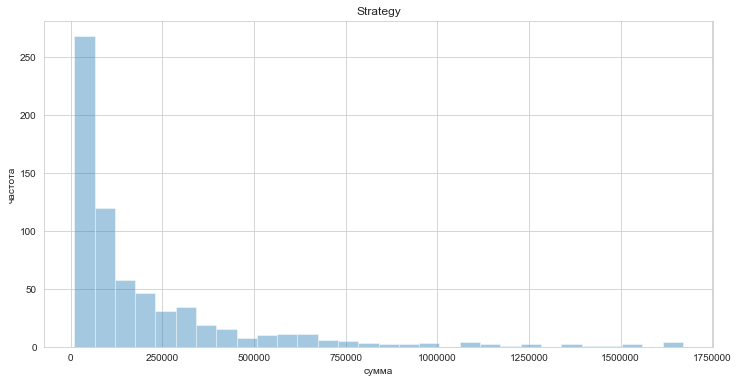

In [78]:
for i in list_genre:
    tmp = games.query('genre == @i')
    maximum = tmp['all_sales'].mean() + (3 * np.std(tmp['all_sales']))
    tmp = tmp.query('0 < all_sales < @maximum')
    plt.figure(figsize=(12, 6))
    sns.distplot(tmp['all_sales'], kde=False, bins=30)
    plt.title(i)
    plt.xlabel('сумма')
    plt.ylabel('частота')
    plt.show()

Посмотрим на получившиеся боксплоты после откидывания выбросов:

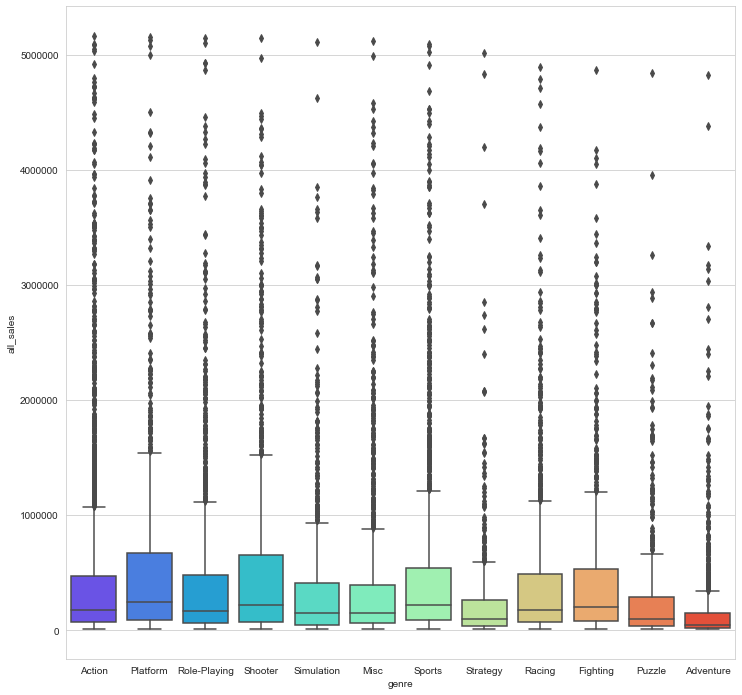

In [79]:
maximum = games['all_sales'].mean() + (3 * np.std(games['all_sales']))
games_good_sales = games.query('0 < all_sales < @maximum')
plt.figure(figsize=(12, 12))
sns.boxplot(x=games_good_sales['genre'], y=games_good_sales['all_sales'], palette='rainbow')
plt.show()

Оставим в данных только интересующий нас период:

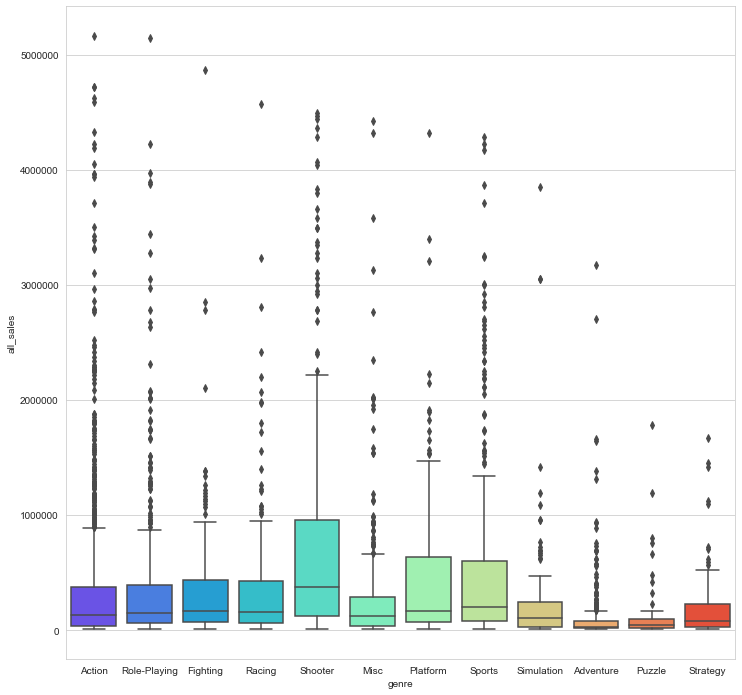

In [80]:
games_good_sales_relevant = games_good_sales.query('year_of_release > 2010')
plt.figure(figsize=(12, 12))
sns.boxplot(x=games_good_sales_relevant['genre'], y=games_good_sales_relevant['all_sales'], palette='rainbow')
plt.show()

Посмотрим на суммарные продажи игр по жанрам. Сначала сформируем сводную таблицу:

In [81]:
good_sales_genre_grouped = (games_good_sales_relevant
                     .pivot_table(index='genre', values='all_sales', aggfunc=['sum', 'count'])
                     .set_axis(['sum', 'count'], axis=1, inplace=False)
                     .sort_values(by=('sum'), ascending=False)
                )
good_sales_genre_grouped

,sum,count
genre,,
Action,464409995,1259
Shooter,243420000,312
Sports,201789999,384
Role-Playing,181790000,458
Misc,108090000,371
Racing,68570000,178
Platform,62740000,119
Fighting,59350000,158
Adventure,45040000,410


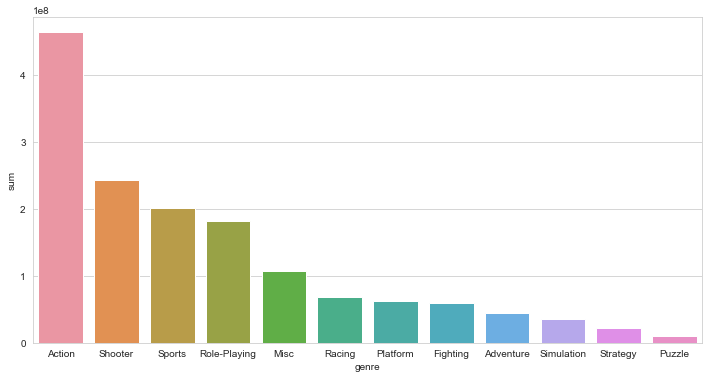

In [82]:
plt.figure(figsize=(12, 6))
sns.barplot(x=good_sales_genre_grouped.index, y='sum', data=good_sales_genre_grouped)

Посмотрим на круговую диаграмму и жанры в процентах:

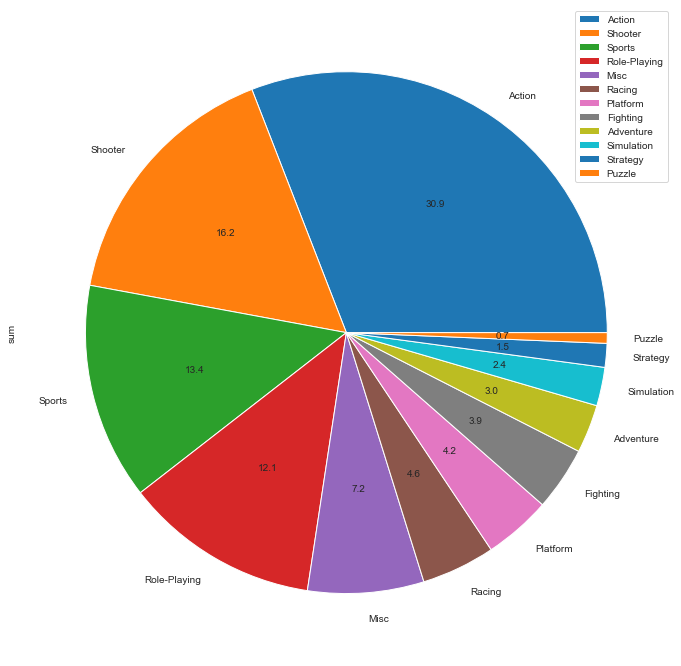

In [83]:
good_sales_genre_grouped.plot(kind='pie', y='sum', figsize=(12, 12), autopct = '%.1f')

Видно, что лучше всех продаются экшены, и шутеры.  
Отстают пазлы и стратегии.

## 4 Составление портрета пользователя каждого региона.

Определим для пользователя каждого региона cамые популярные платформы (топ-5) и опишем различия в долях продаж.

Сформируем список регионов:

In [84]:
list_regions = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']

Посмотрим на графики сумм продаж платформ по этим регионам:

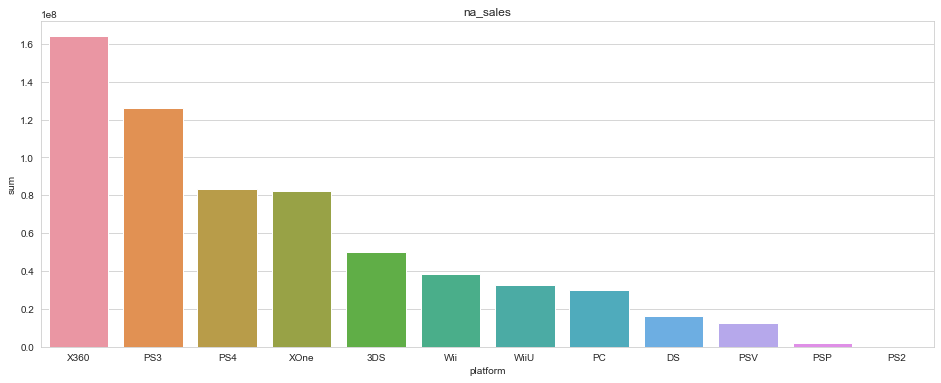

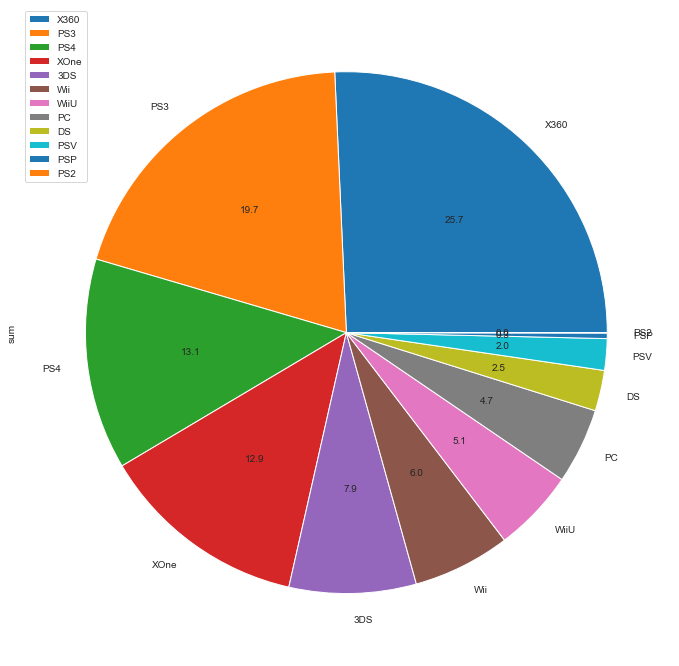

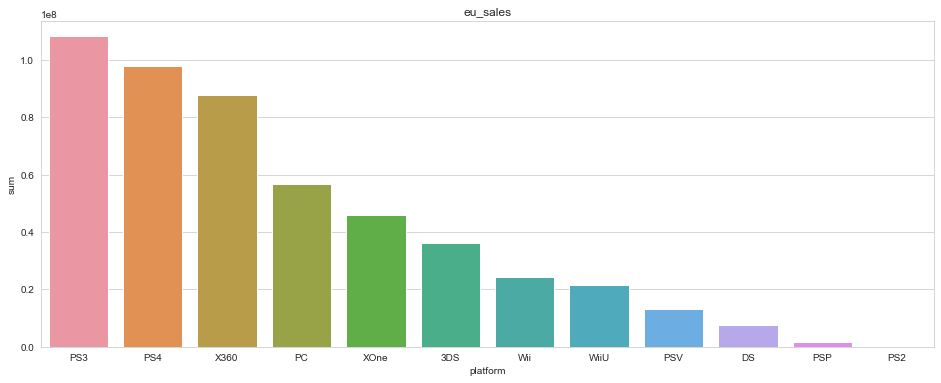

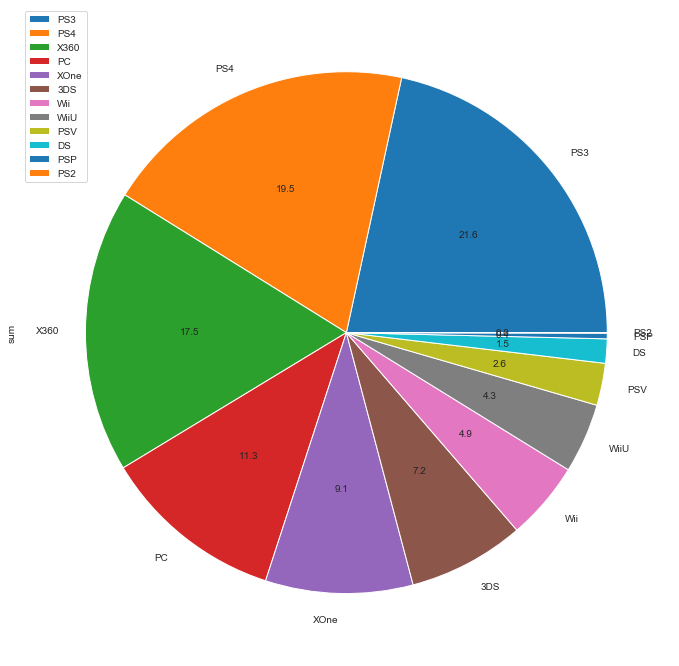

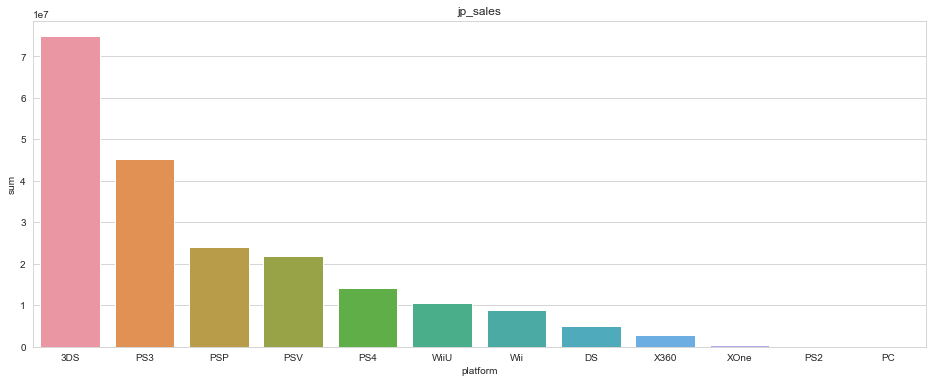

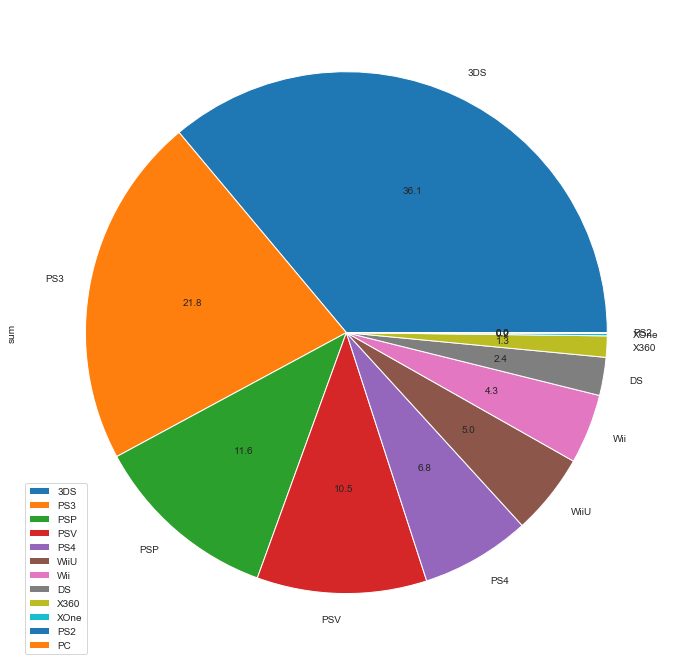

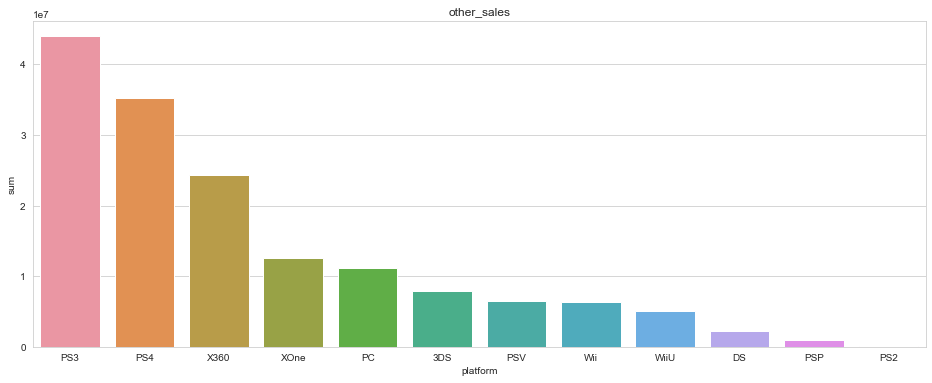

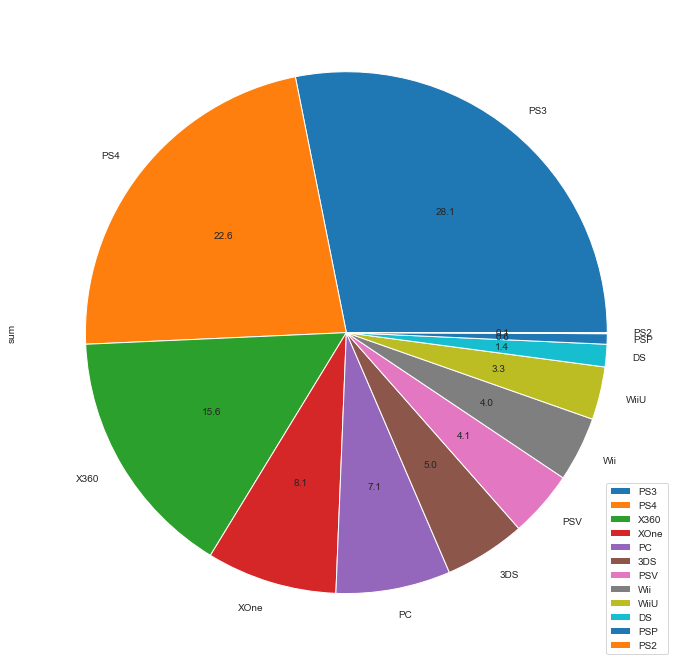

In [85]:
for i in list_regions:
    platform_good_sales_regions = (games_good_sales_relevant
                                    .pivot_table(index='platform', values=i, aggfunc=['sum', 'count'])
                                    .set_axis(['sum', 'count'], axis=1, inplace=False)
                                    .sort_values(by=('sum'), ascending=False)
                               )
    plt.figure(figsize=(16, 6))
    sns.barplot(x=platform_good_sales_regions.index, y='sum', data=platform_good_sales_regions)
    plt.title(i)
    plt.show()
    platform_good_sales_regions.plot(kind='pie', y='sum', figsize=(12, 12), autopct = '%.1f')
    plt.show()    

In [86]:
for i in list_regions:
    platform_good_sales_regions = (games_good_sales_relevant
                                    .pivot_table(index='platform', values=i, aggfunc=['sum', 'count'])
                                    .set_axis(['summ', 'count'], axis=1, inplace=False)
                                    .sort_values(by=('summ'), ascending=False)
                               )
    maximum = platform_good_sales_regions['summ'].max()
    maximum_str = platform_good_sales_regions.query('summ == @maximum').reset_index()
    max_platform = maximum_str.loc[0, 'platform']
    minimum = platform_good_sales_regions['summ'].min()
    minimum_str = platform_good_sales_regions.query('summ == @minimum').reset_index()
    min_platform = minimum_str.loc[0, 'platform']
    print(f'Самые большие продажи в {i}:  ', max_platform)
    print(f'Самые маленькие продажи в {i}:', min_platform)
    print()

Самые большие продажи в na_sales:   X360
Самые маленькие продажи в na_sales: PS2

Самые большие продажи в eu_sales:   PS3
Самые маленькие продажи в eu_sales: PS2

Самые большие продажи в jp_sales:   3DS
Самые маленькие продажи в jp_sales: PC

Самые большие продажи в other_sales:   PS3
Самые маленькие продажи в other_sales: PS2



Из графиков видно:
- в Северной америке пользуются популярностью платформы -X360, PS3, PS4, XOne и 3DS.
- в Европпе - PS3, PS4, X360, PC, и XOne.
- в Японии - 3DS, PS3, PSP, PSV и PS4.
- в других странах - PS3, PS4, X360, XOneи и PC.

Посмотрим на графики сумм продаж жанров по регионам:

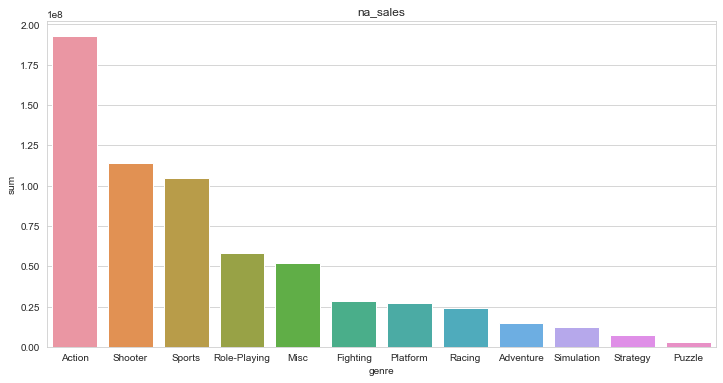

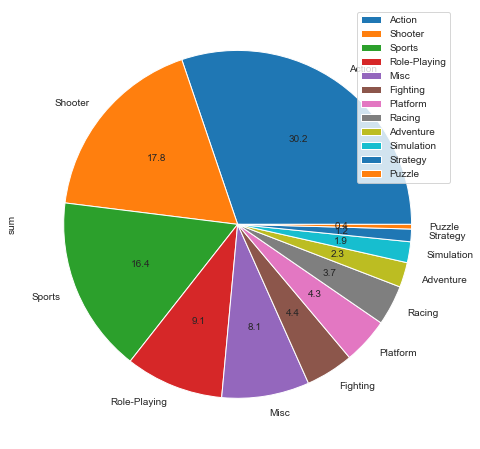

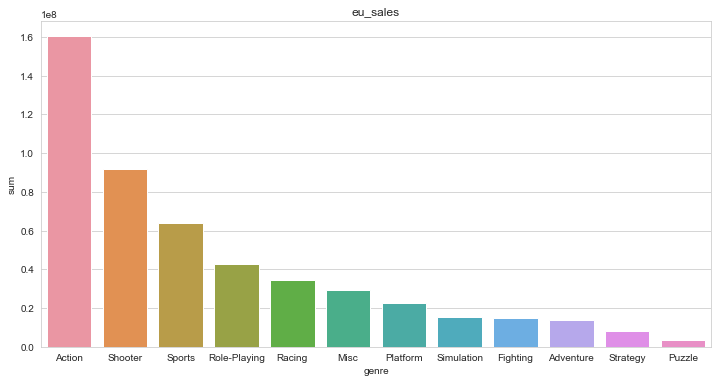

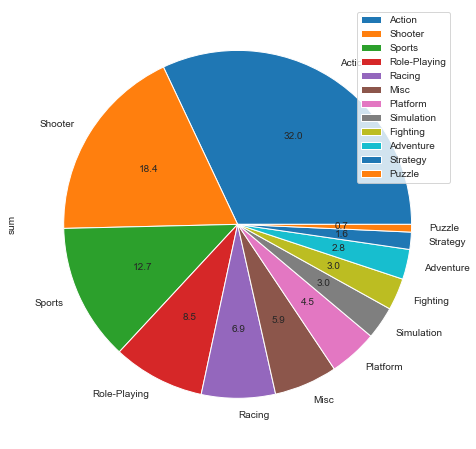

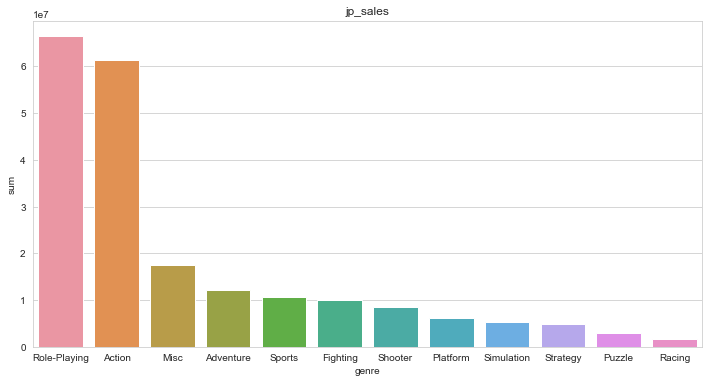

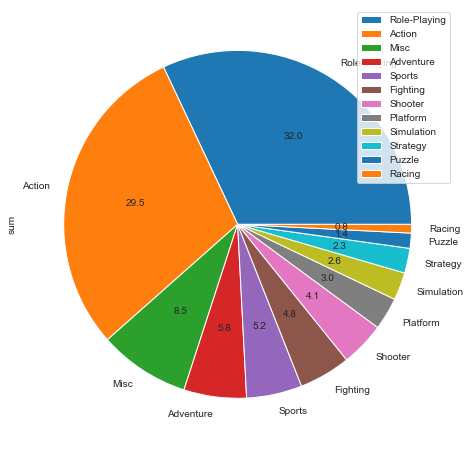

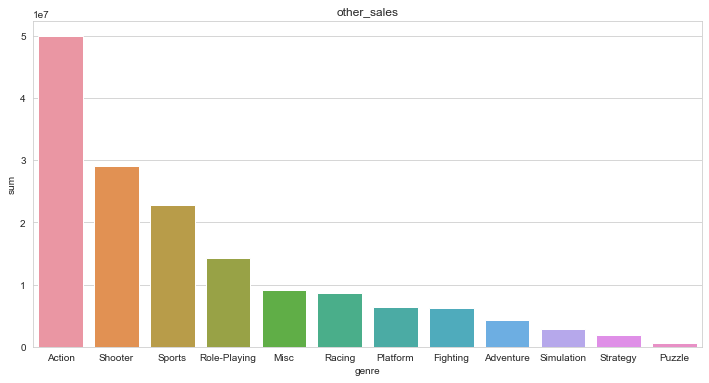

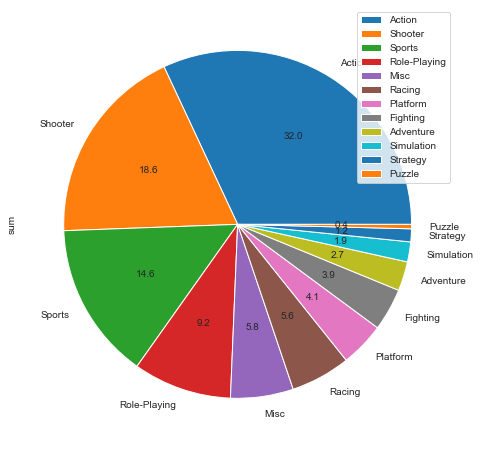

In [87]:
for i in list_regions:
    genre_good_sales_regions = (games_good_sales_relevant
                                    .pivot_table(index='genre', values=i, aggfunc=['sum', 'count'])
                                    .set_axis(['sum', 'count'], axis=1, inplace=False)
                                    .sort_values(by=('sum'), ascending=False)
                               )
    plt.figure(figsize=(12, 6))
    sns.barplot(x=genre_good_sales_regions.index, y='sum', data=genre_good_sales_regions)
    plt.title(i)
    plt.show()
    genre_good_sales_regions.plot(kind='pie', y='sum', figsize=(8, 8), autopct = '%.1f')
    plt.show()    

In [88]:
for i in list_regions:
    tmp = games_good_sales[i]
    genre_good_sales_regions = (games_good_sales_relevant
                                    .pivot_table(index='genre', values=i, aggfunc=['sum', 'count'])
                                    .set_axis(['summ', 'count'], axis=1, inplace=False)
                                    .sort_values(by=('summ'), ascending=False)
                               )
    maximum = genre_good_sales_regions['summ'].max()
    maximum_str = genre_good_sales_regions.query('summ == @maximum').reset_index()
    max_genre = maximum_str.loc[0, 'genre']
    minimum = genre_good_sales_regions['summ'].min()
    minimum_str = genre_good_sales_regions.query('summ == @minimum').reset_index()
    min_genre = minimum_str.loc[0, 'genre']
    print(f'Самые большие продажи в {i}:  ', max_genre)
    print(f'Самые маленькие продажи в {i}:', min_genre)
    print()

Самые большие продажи в na_sales:   Action
Самые маленькие продажи в na_sales: Puzzle

Самые большие продажи в eu_sales:   Action
Самые маленькие продажи в eu_sales: Puzzle

Самые большие продажи в jp_sales:   Role-Playing
Самые маленькие продажи в jp_sales: Racing

Самые большие продажи в other_sales:   Action
Самые маленькие продажи в other_sales: Puzzle



Из графиков видно:  
- в Северной америке пользуются свмые популярные жанры - экшен, стрелялки, спорт, ролевые игры, и миск.
- в Европпе - экшен, стрелялки, спорт, ролевые игры, и гонки
- в Японии - ролевые игры, экшен, миск, приключения, и спорт.
- в других странах - экшен, стрелялки, спорт, ролевые игры и миск.

Определим, влияет ли рейтинг ESRB на продажи в отдельном регионе:

In [89]:
list_rating = list(games_good_sales_relevant['rating'].unique())
list_rating

['E', 'M', 'unknown', 'T', 'E10+', 'EC', 'RP']

«E» («Everyone») — «Для всех»: Содержание вполне подходит для возрастной категории старше 6 лет; такие игры могут понравиться и взрослым. Игры с этим рейтингом могут содержать минимальное насилие, в основном «мультяшного» характера. Первой игрой, которая получила данный рейтинг, стала The Simpsons Cartoon Studio, выпущенная в 1996 году.  

«M» («Mature») — «От 17 лет»: Материалы игры не подходят для возрастной категории младше 17 лет. Проекты с данным рейтингом могут содержать достаточно жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику, нежелательную для младшей аудитории. Из последних игр это Saboteur, Left 4 Dead 2.  

«T» («Teen») — «Подросткам 13—19 лет»: Игра подходит для подростков старше 13 лет. Проекты из данной категории могут содержать насилие, непристойные сцены, грубый юмор, в меру откровенное сексуальное содержимое, кровь или нечастое использование ненормативной лексики. Примером может являться Rise of the Argonauts.  

«E10+» («Everyone 10 and older») — «Для всех старше 10 лет»: Возрастная категория — от 10 лет. Проекты с данным рейтингом могут содержать немного больше мультипликационного или мягкого насилия, или несколько откровенные сцены. Рейтинг был принят ESRB 2 марта 2005 года. Первой игрой, которая получила данный рейтинг, стала Donkey Kong: Jungle Beat.  

«K-A» («Kids to Adults»)— «Для детей и взрослых»: Содержание игры вполне подходит для возрастной категории от 6 лет и старше. Такие игры подходят для всех возрастов. Они могут содержать минимальное насилие или немного грубый разговорный язык. Этот рейтинг был заменён на «Everyone» 1 января 1998 года и может встречаться только в играх, изданных ранее, кроме[источник не указан 92 дня] The Simpsons Cartoon Studio. Первой игрой, получившей данный рейтинг, стала SimCity 2000 в 1993 году.  

«AO» («Adults Only 18+») — «Только для взрослых»: Содержание игры только для взрослых. Продукты из данной категории могут содержать длительные сцены жестокого насилия и/или очень откровенное сексуальное содержимое, а также сцены с обнажением. Не знаю ни одной игры с таким рейтингом, если вспомните - скажите.  

«EC» («Early childhood») — «Для детей младшего возраста»: Игра подходит для детей от 3 лет и старше и не содержит материалов, которые родители могли бы счесть неподходящими. Игры, получившие данный рейтинг, изначально разрабатываются для детей и обычно представляют собой развивающие игры. Некоторые усложнённые развивающие игры могут иметь рейтинг «E».  

«RP» ( «Rating Pending»») — «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоение рейтинга. Данный логотип используется только на рекламных презентациях и в демо-версиях игр до официального релиза.

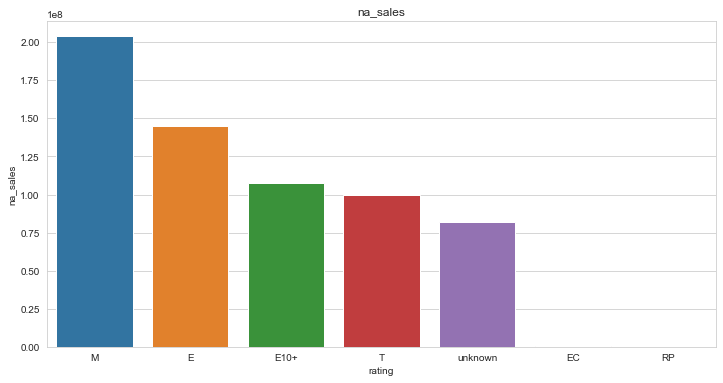

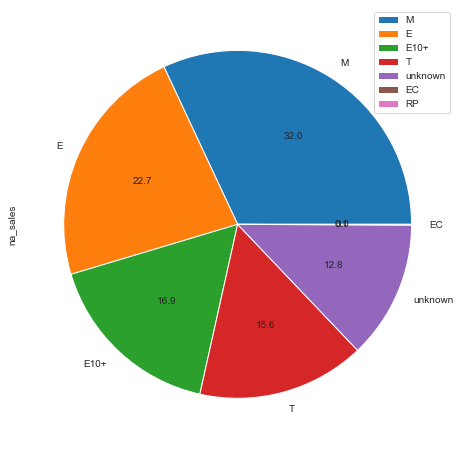

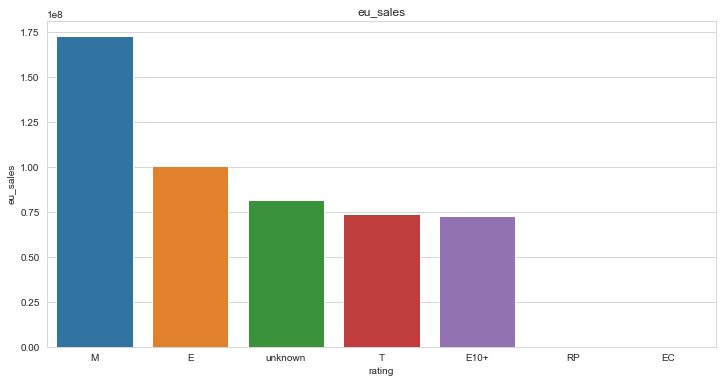

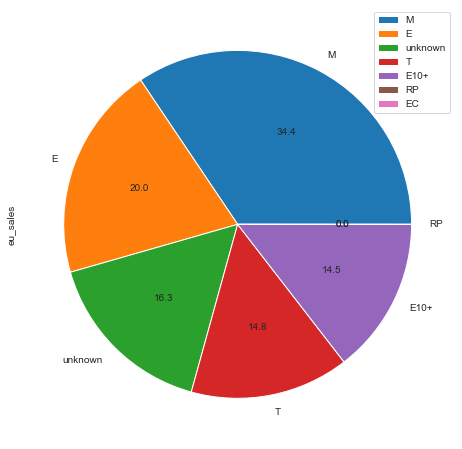

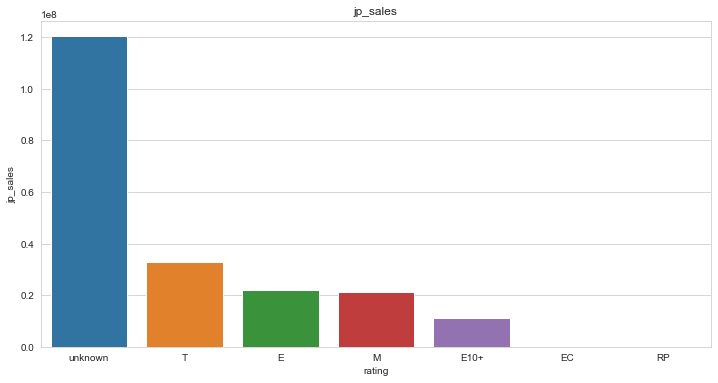

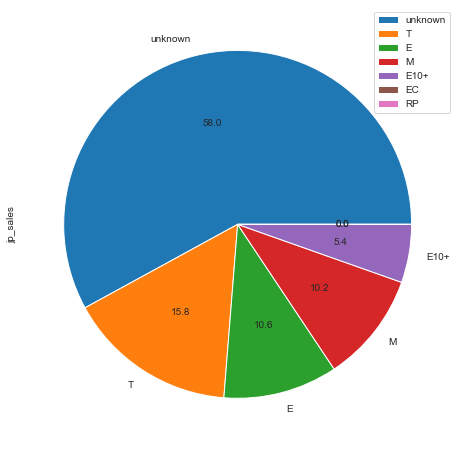

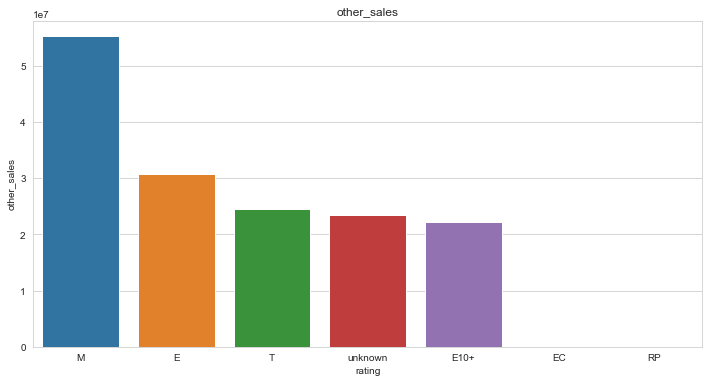

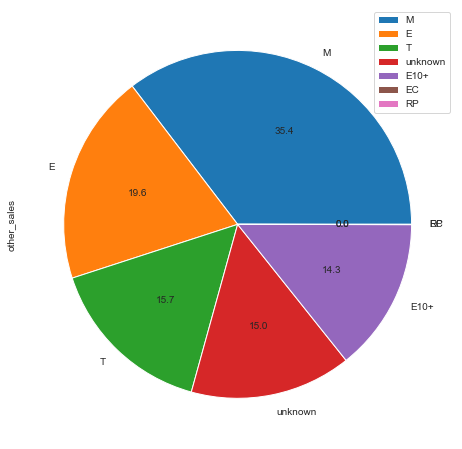

In [90]:
for i in list_regions:
    rating_games_good_sales = (games_good_sales_relevant
                                   .groupby('rating')
                                   .agg({i: 'sum'})
                                   .sort_values(by=i, ascending=False)
                              )
    plt.figure(figsize=(12, 6))
    sns.barplot(x=rating_games_good_sales.index, y=i, data=rating_games_good_sales)
    plt.title(i)
    plt.show()
    rating_games_good_sales.plot(kind='pie', y=i, figsize=(8, 8), autopct = '%.1f')
    plt.show() 



In [91]:
for i in list_regions:
    rating_games_good_sales = (games_good_sales_relevant
                                   .groupby('rating')
                                   .agg({i: 'sum'})
                                   .sort_values(by=i, ascending=False)
                               )
    tmp = rating_games_good_sales[i]
    maximum = rating_games_good_sales[i].max()
    maximum_str = rating_games_good_sales.query('@tmp == @maximum').reset_index()
    max_rating = maximum_str.loc[0, 'rating']
    minimum = rating_games_good_sales[i].min()
    minimum_str = rating_games_good_sales.query('@tmp == @minimum').reset_index()
    min_rating = minimum_str.loc[0, 'rating']
    print(f'Самые большие продажи в {i} у рейтинга:  ', max_rating)
    print(f'Самые маленькие продажи в {i} у рейтинга:', min_rating)
    print()

Самые большие продажи в na_sales у рейтинга:   M
Самые маленькие продажи в na_sales у рейтинга: RP

Самые большие продажи в eu_sales у рейтинга:   M
Самые маленькие продажи в eu_sales у рейтинга: EC

Самые большие продажи в jp_sales у рейтинга:   unknown
Самые маленькие продажи в jp_sales у рейтинга: EC

Самые большие продажи в other_sales у рейтинга:   M
Самые маленькие продажи в other_sales у рейтинга: RP



Исходя из графиков, можно сделать вывод, что в рейтинг влияет на продажи в отдельных регионах. Во всех регионах лучше всего продаётся рейтинг M. Потом идут E и T. В рейтинг unknown скорее всего входит большая часть рейтинга M, т.к. в Японии он лучше всего продаётся, а рейтинг M не на первом месте.

## 5 Проверка гипотез.

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

Нулевая гипотиза сформулирована в задаче - средние пользовательские рейтинги Xbox One и PC равны. Соответсвенно альтернативная гипотиза - они отличаются.  

Пороговое значение alpha будет 5%, т.к. эти исследования не влияют на жизни людей и не требуют ОЧЕНЬ большой точности, поэтому ошибка в 5 случаях из 100 - допустимый порог.  
Критерий для проверки гипотиз выбираем ttest_ind, т.к. выборки не парные(данные не до и после какого - либо события) и сравнивается в принцепе один показатель.

In [92]:
from scipy import stats as st

In [93]:
alpha = .05
results = st.ttest_ind(
    games_good_sales_relevant.query('platform == "XOne"')['user_score'],
    games_good_sales_relevant.query('platform == "PC"')['user_score'],
    equal_var=True
)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.2567696486656413
Не получилось отвергнуть нулевую гипотезу


Данное p-value около 25% и говорит о том,что ошибка предположения о неравенстве средних этих совокупностей велика. Можно сделать вывод, что рейтинг с большой вероятностью одинаковы.

### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Альтернативная гипотиза сформулирована в задаче - средние пользовательские рейтинги Action и Sports различны. Соответсвенно нулевая гипотиза - они равны.  

Пороговое значение alpha будет 5%, т.к. эти исследования не влияют на жизни людей и не требуют ОЧЕНЬ большой точности.  
Критерий для проверки гипотиз выбираем ttest_ind, т.к. выборки не парные(данные не до и после какого - либо события)  и сравнивается в принцепе один показатель.

In [94]:
alpha = .05
results = st.ttest_ind(
    games_good_sales_relevant.query('genre == "Action"')['user_score'],
    games_good_sales_relevant.query('genre == "Sports"')['user_score'],
    equal_var=True
)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.7681122300045505
Не получилось отвергнуть нулевую гипотезу


Значение p-значение очень большое.  
Значит ошибка предположения о неравинстве средних двух совокупностей большая. Следовательно, не получилось отвергнуть нулевую гипотизу о равенстве рейтингов, получается что рейтинги с большей вероятностью одинаковы. Это противоречит предположению в тексте вопроса. 

## 6 Общий вывод.

Были проанализированы данные о работе магазина «Стримчик». Исправлены типы данных и заполнены пропуски. Добавлены и посчитаны данные об общих продажах. Проведены исследования по актуальному периоду начала и конца продаж платформ, построены графики по распределиям продаж по жанрам, рейтингам, регионам, возрастным рейтингам. Можно сказать, среди игровового мира сильно выделяется Япония. Проверены гипотизы по совпадению пользовательских рейтингов платформ Xbox One и PC отличаю пользовательских рейтингов жанров Action и Sports. Пользовательские рейтинги Xbox One и PC скорее отличаются, чем нет и пользовательские рейтинги Action и Sports скорее отличаются, чем нет. Наиболее привлекательные для пользователей жанрамы - экшен, спорт, стрелялки; платформы - PSV, PS4, PC, XOne; наиболее предпочтительные для продажи рейтинги - E', 'M', 'T'. Соответсвенно, что наиболее предполочтительно для пользователя, будет лучше продаватся.